<a href="https://colab.research.google.com/github/juanprado17/DH100/blob/main/DATA100_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MAJOR LEAGUE SOCCER EARNINGS 2007-2017 


##Tools
The tools that I will be using for this project include, numpy, pandas, and the matplotlib libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#This is just so I am able to see all the rows in the dataset instead of only
#seeing part of the data.
pd.set_option("max_rows", 999)

#Research Question 1:
The first research question is:


*   Which year and position generated the highest total salary over the time period of 2007- 2017?

##Data Imports:
The data that is going to be imported into this notebook was all pre-collected on [Kaggle](https://www.kaggle.com/crawford/us-major-league-soccer-salaries). It is worth noting that each set of data from each year was its own .csv file. The data sets contained data on the salaries of Major League Soccer players ranging from the year 2007 through 2017.




In [2]:
#The MLS salaries dataset contains all of the earnings in dollars of over five thousand MLS soccer players.
#The data that is going to be analyzed ranges from the year 2007 through 2017. The data in fact has two columns 
#in which it gives the base salary in one of the columns and guarenteed compensation in the other column. For the 
#matter of simplicity we are going to compare the players salaries by only looking at the guarenteed compensation.
salaries_07 = pd.read_csv("mls-salaries-2007.csv")
salaries_08 = pd.read_csv("mls-salaries-2008.csv")
salaries_09 = pd.read_csv("mls-salaries-2009.csv")
salaries_10 = pd.read_csv("mls-salaries-2010.csv")
salaries_11 = pd.read_csv("mls-salaries-2011.csv")
salaries_12 = pd.read_csv("mls-salaries-2012.csv")
salaries_13 = pd.read_csv("mls-salaries-2013.csv")
salaries_14 = pd.read_csv("mls-salaries-2014.csv")
salaries_15 = pd.read_csv("mls-salaries-2015.csv")
salaries_16 = pd.read_csv("mls-salaries-2016.csv")
salaries_17 = pd.read_csv("mls-salaries-2017.csv")

salaries_17.head()

,club,last_name,first_name,position,base_salary,guaranteed_compensation
0,ATL,Almiron,Miguel,M,1912500.0,2297000.00
1,ATL,Ambrose,Mikey,D,65625.0,65625.00
2,ATL,Asad,Yamil,M,150000.0,150000.00
3,ATL,Bloom,Mark,D,99225.0,106573.89
4,ATL,Carleton,Andrew,F,65000.0,77400.00


##Data Cleaning and Manipulation:
The data that was imported was well organized but not perfect. The data indeed had missing values that were needed within certain columns, which made it a little challeging to work with. So, to make sure that we are working with clean data, the rows that contained any missing values were dropped using the **.dropna()** function.

As noted in the table above, the data contains six columns. For this project we are going to be comparing salaries and we will only be looking at the 'guaranteed_compensation' column, which makes the 'base_salary' column not necessary at this point. The **.drop()** function was used to drop the 'base_salary' column.

The position column contains useful information that we are going to use to help us answer research question 1. A part of this research question requires to find the position that generated the highest salary, so to make the data easier to work with and understand, the 'position' column will be organized in alphabetical order. In order to organize the data in alphabetical order the .**sort_values()** function was used. 

In [ ]:
#Data Cleaning:
#Using the .dropna() function in order to avoid using data that has missing values. 
#Basically, what the .dropna() function is saying is, "drop the row with at least one element missing"
#Source: https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php
#2007 data:
new_salaries_07 = salaries_07.dropna()
new_salaries_07.drop('base_salary', axis = 1, inplace = True)
new_salaries_07.sort_values(by = ['position']);

#2008 data:
new_salaries_08 = salaries_08.dropna()
new_salaries_08.drop('base_salary', axis = 1, inplace = True)
new_salaries_08.sort_values(by = ['position']);

#2009 data:
new_salaries_09 = salaries_09.dropna()
new_salaries_09.drop('base_salary', axis = 1, inplace = True)
new_salaries_09.sort_values(by = ['position']);

#2010 data:
new_salaries_10 = salaries_10.dropna()
new_salaries_10.drop('base_salary', axis = 1, inplace = True)
new_salaries_10.sort_values(by = ['position']);

#2011 data:
new_salaries_11 = salaries_11.dropna()
new_salaries_11.drop('base_salary', axis = 1, inplace = True)
new_salaries_11.sort_values(by = ['position'])

#2012 data:
new_salaries_12 = salaries_12.dropna()
new_salaries_12.drop('base_salary', axis = 1, inplace = True)
new_salaries_12.sort_values(by = ['position'])

#2013 data:
new_salaries_13 = salaries_13.dropna()
new_salaries_13.drop('base_salary', axis = 1, inplace = True)
new_salaries_13.sort_values(by = ['position']);

#2014 data:
new_salaries_14 = salaries_14.dropna()
new_salaries_14.drop('base_salary', axis = 1, inplace = True)
new_salaries_14.sort_values(by = ['position']);

#2015 data:
new_salaries_15 = salaries_15.dropna()
new_salaries_15.drop('base_salary', axis = 1, inplace = True)
new_salaries_15.sort_values(by = ['position']);

#2016 data:
new_salaries_16 = salaries_16.dropna()
new_salaries_16.drop('base_salary', axis = 1, inplace = True)
new_salaries_16.sort_values(by = ['position']);

#2017 data:
new_salaries_17 = salaries_17.dropna()
new_salaries_17.drop('base_salary', axis = 1, inplace = True)
new_salaries_17.sort_values(by = ['position']);

In [7]:
new_salaries_14['guaranteed_compensation']
maxx = max(new_salaries_14['guaranteed_compensation'])
maxx


6695188.75

##Data Cleaning and Manipulation:
Now that we have all of our data in alphabetical order based on 'position' we can now grab the rows that contain each distinct position and sum up the 'guarenteed_compensation' column to help answer the research question. The dataset was inconsistent with the abbreviations of the specific positions of the players, so I decided to just categorize the posotions into more general descriptions. For example:

*   GK = Goalkeeper
*   D = Defense
*   M = Midfield 
*   F = Forward

The reason is because in the dataset:
  
*   Goalkeeper is represented as GK
*   Defense is represented as D, F-D, D-F
*   Midfield is represented as M, D-M, M-D, M-F, M/F, MF
*   Forward is represented as F, F-M, F/M

A bit confusing but, being able to narrow it down and making these bins:

*   GK_XX
*   D_XX
*   M_XX
*   F_XX

make it a more understandable. In order to make those bins, the **.isin()** function was used.

After the bins were created for the subgroups, the 'guaranteed_compensation' column was summed up for each bin in order to find out which position genereated the highest total salary over the years. To do this we will use the sum() function.


In [ ]:
#Now that we have all of our data in alphabetical order based on position we can now grab the rows that contain each distinct 
#position and sum up the 'guarenteed_compensation' column to help answer our research question. The dataset was inconsistent 
#with the abbreviations of the specific positions of the players so I decided to just categorize the posotions into more 
#general descriptions. For example, GK = Goalkeeper, D = Defense, M = Midfield, F = Forward. The reason is because in the
#dataset Defense is represented as D, F-D, D-F, Midfield is represented as M, D-M, M-D, M-F, M/F, MF, Forward is represented as
#F, F-M, F/M, and Goalkeeper is just GK. A bit confusing but, being able to narrow it down and making these bins make it a little
#more understandable. 

#I will extract these four different positions from 'new_salaries_07' to compare and help answer the first research question.
#In order to do this I will use some methods of row extraction. For the extraction of multiple subgroups I will use the .isin() function.
#Source: https://colab.research.google.com/github/jigsawlabs-student/pandas-free-curriculum/blob/master/4-selecting-rows-lab.ipynb
#Source: https://stackoverflow.com/questions/36410075/select-rows-from-a-dataframe-based-on-multiple-values-in-a-column-in-pandas

#2007 Dataset:
GK_07 = new_salaries_07[new_salaries_07['position'] == 'GK']  
D_07 = new_salaries_07[new_salaries_07['position'].isin(['D', 'F-D', 'D-F'])]  
M_07 = new_salaries_07[new_salaries_07['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_07 = new_salaries_07[new_salaries_07['position'].isin(['F', 'F-M', 'F/M'])]

#We will then sum up the 'guaranteed_compensation' column in order to find out which position genereated the highest total salary
#over the years. To do this we will use the sum() function
sum_GK_07 = GK_07['guaranteed_compensation'].sum()
sum_GK_07

sum_D_07 = D_07['guaranteed_compensation'].sum()
sum_D_07

#For some reason the cents are added up weird. Assuming it's .41 cents
sum_M_07 = M_07['guaranteed_compensation'].sum()
sum_M_07

sum_F_07 = F_07['guaranteed_compensation'].sum()
sum_F_07

#2008 Dataset
GK_08 = new_salaries_08[new_salaries_08['position'] == 'GK']  
D_08 = new_salaries_08[new_salaries_08['position'].isin(['D', 'F-D', 'D-F'])]  
M_08 = new_salaries_08[new_salaries_08['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_08 = new_salaries_08[new_salaries_08['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_08 = GK_08['guaranteed_compensation'].sum()
sum_GK_08

sum_D_08 = D_08['guaranteed_compensation'].sum()
sum_D_08

sum_M_08 = M_08['guaranteed_compensation'].sum()
sum_M_08

sum_F_08 = F_08['guaranteed_compensation'].sum()
sum_F_08

#2009 Dataset:
GK_09 = new_salaries_09[new_salaries_09['position'] == 'GK']  
D_09 = new_salaries_09[new_salaries_09['position'].isin(['D', 'F-D', 'D-F'])]  
M_09 = new_salaries_09[new_salaries_09['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_09 = new_salaries_09[new_salaries_09['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_09 = GK_09['guaranteed_compensation'].sum()
sum_GK_09

sum_D_09 = D_09['guaranteed_compensation'].sum()
sum_D_09

sum_M_09 = M_09['guaranteed_compensation'].sum()
sum_M_09

sum_F_09 = F_09['guaranteed_compensation'].sum()
sum_F_09

#2010 Dataset:
GK_10 = new_salaries_10[new_salaries_10['position'] == 'GK']  
D_10 = new_salaries_10[new_salaries_10['position'].isin(['D', 'F-D', 'D-F'])]  
M_10 = new_salaries_10[new_salaries_10['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_10 = new_salaries_10[new_salaries_10['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_10 = GK_10['guaranteed_compensation'].sum()
sum_GK_10

sum_D_10 = D_10['guaranteed_compensation'].sum()
sum_D_10

sum_M_10 = M_10['guaranteed_compensation'].sum()
sum_M_10

sum_F_10 = F_10['guaranteed_compensation'].sum()
sum_F_10

#2011 Dataset:
GK_11 = new_salaries_11[new_salaries_11['position'] == 'GK']  
D_11 = new_salaries_11[new_salaries_11['position'].isin(['D', 'F-D', 'D-F'])]  
M_11 = new_salaries_11[new_salaries_11['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_11 = new_salaries_11[new_salaries_11['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_11 = GK_11['guaranteed_compensation'].sum()
sum_GK_11

sum_D_11 = D_11['guaranteed_compensation'].sum()
sum_D_11

sum_M_11 = M_11['guaranteed_compensation'].sum()
sum_M_11

sum_F_11 = F_11['guaranteed_compensation'].sum()
sum_F_11

#2012 Dataset:
GK_12 = new_salaries_12[new_salaries_12['position'] == 'GK']  
D_12 = new_salaries_12[new_salaries_12['position'].isin(['D', 'F-D', 'D-F'])]  
M_12 = new_salaries_12[new_salaries_12['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_12 = new_salaries_12[new_salaries_12['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_12 = GK_12['guaranteed_compensation'].sum()
sum_GK_12

sum_D_12 = D_12['guaranteed_compensation'].sum()
sum_D_12

sum_M_12 = M_12['guaranteed_compensation'].sum()
sum_M_12

sum_F_12 = F_12['guaranteed_compensation'].sum()
sum_F_12

#2013 Dataset:
GK_13 = new_salaries_13[new_salaries_13['position'] == 'GK']  
D_13 = new_salaries_13[new_salaries_13['position'].isin(['D', 'F-D', 'D-F'])]  
M_13 = new_salaries_13[new_salaries_13['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_13 = new_salaries_13[new_salaries_13['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_13 = GK_13['guaranteed_compensation'].sum()
sum_GK_13

sum_D_13 = D_13['guaranteed_compensation'].sum()
sum_D_13

sum_M_13 = M_13['guaranteed_compensation'].sum()
sum_M_13

sum_F_13 = F_13['guaranteed_compensation'].sum()
sum_F_13

#2014 Dataset:
GK_14 = new_salaries_14[new_salaries_14['position'] == 'GK']  
D_14 = new_salaries_14[new_salaries_14['position'].isin(['D', 'F-D', 'D-F'])]  
M_14 = new_salaries_14[new_salaries_14['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_14 = new_salaries_14[new_salaries_14['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_14 = GK_14['guaranteed_compensation'].sum()
sum_GK_14

sum_D_14 = D_14['guaranteed_compensation'].sum()
sum_D_14

sum_M_14 = M_14['guaranteed_compensation'].sum()
sum_M_14

sum_F_14 = F_14['guaranteed_compensation'].sum()
sum_F_14

#2015 Dataset:
GK_15 = new_salaries_15[new_salaries_15['position'] == 'GK']  
D_15 = new_salaries_15[new_salaries_15['position'].isin(['D', 'F-D', 'D-F'])]  
M_15 = new_salaries_15[new_salaries_15['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_15 = new_salaries_15[new_salaries_15['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_15 = GK_15['guaranteed_compensation'].sum()
sum_GK_15

sum_D_15 = D_15['guaranteed_compensation'].sum()
sum_D_15

sum_M_15 = M_15['guaranteed_compensation'].sum()
sum_M_15

sum_F_15 = F_15['guaranteed_compensation'].sum()
sum_F_15

#2016 Dataset:
GK_16 = new_salaries_16[new_salaries_16['position'] == 'GK']  
D_16 = new_salaries_16[new_salaries_16['position'].isin(['D', 'F-D', 'D-F'])]  
M_16 = new_salaries_16[new_salaries_16['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_16 = new_salaries_16[new_salaries_16['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_16 = GK_16['guaranteed_compensation'].sum()
sum_GK_16

sum_D_16 = D_16['guaranteed_compensation'].sum()
sum_D_16

sum_M_16 = M_16['guaranteed_compensation'].sum()
sum_M_16

sum_F_16 = F_16['guaranteed_compensation'].sum()
sum_F_16

#2017 Dataset:
GK_17 = new_salaries_17[new_salaries_17['position'] == 'GK']  
D_17 = new_salaries_17[new_salaries_17['position'].isin(['D', 'F-D', 'D-F'])]  
M_17 = new_salaries_17[new_salaries_17['position'].isin(['M', 'D-M', 'M-D', 'M-F', 'M/F', 'MF'])]
F_17 = new_salaries_17[new_salaries_17['position'].isin(['F', 'F-M', 'F/M'])]

sum_GK_17 = GK_17['guaranteed_compensation'].sum()
sum_GK_17

sum_D_17 = D_17['guaranteed_compensation'].sum()
sum_D_17

sum_M_17 = M_17['guaranteed_compensation'].sum()
sum_M_17

sum_F_17 = F_17['guaranteed_compensation'].sum()
sum_F_17

63045355.34

##Research Question 1 Graphs:
###Goalkeeper Graph 
A total of 4 graphs were made, each representing a specific position and its change in salaries over time. For example, for the first graph, 'MLS Goalkeeper Total Salaries/Year' the sum of the GK salaries for the year 2007 (represented as sum_GK_07 in the above code) is shown i[link text](https://)n the first bar of the graph, and so on with the furthur years and positions.


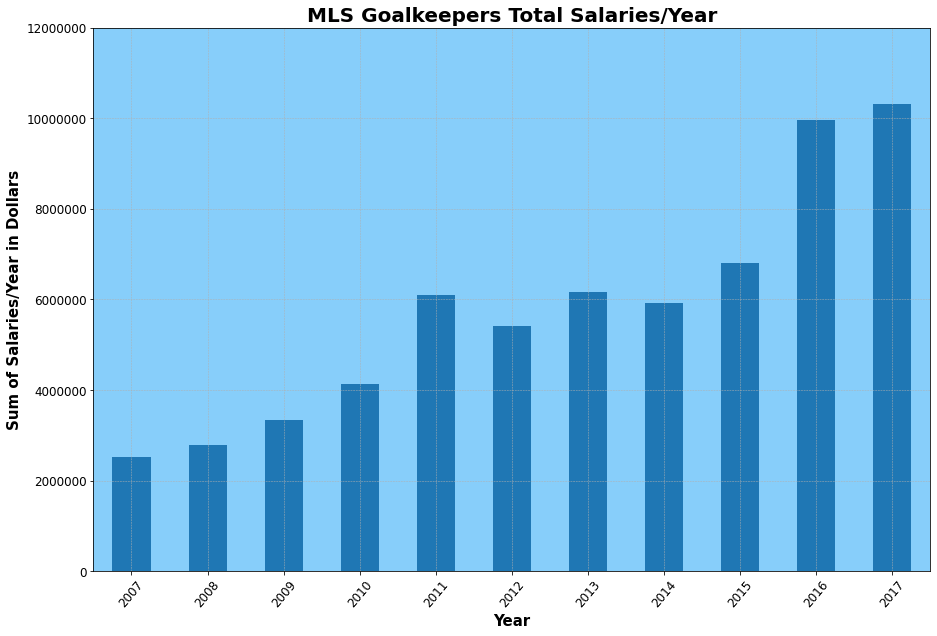

In [ ]:
#This graph is going to represent the GK salaries from 2007-2017.
#Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html#pandas.DataFrame.plot.bar
GK_graph = pd.DataFrame({'Year':['2007', '2008', '2009', '2010', '2011', '2012', 
                                 '2013', '2014', '2015', '2016', '2017'], 'Salary'
                                 :[2520132.1, 2791094.95, 3347687.36, 4136779.99, 6103987.79, 
                                   5410775.54, 6168036.83, 5929929.66, 6796012.28, 9963257.36, 10313235.12]})
ax = GK_graph.plot.bar(x = 'Year', y = 'Salary', rot = 50, figsize = (15, 10))

#Source:https://stackoverflow.com/questions/46735745/how-to-control-scientific-notation-in-matplotlib
plt.ticklabel_format(style='plain', axis='y')
plt.title('MLS Goalkeepers Total Salaries/Year', fontsize = 20, fontweight = 'bold');
plt.xlabel('Year', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 12);
plt.ylabel('Sum of Salaries/Year in Dollars', fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 12);
plt.ylim(0, 12000000)
ax.set_facecolor('lightskyblue')
plt.grid(linestyle = '--', linewidth = 0.5)
ax.get_legend().remove()

plt.show()


##Interpretation of the Graph:
The main research question stated:

- Which year and position generated the highest total salary over the time period of 2007- 2017?

and the year that generated the highest salary for Goalkeepers was in 2017, the total salary of Goalkeepers was roughly above 10,000,000.00 dollars but, if we wanted to be exact, in 2017 the total salary of Goalkeepers was 10,313,235.12 dollars. 
 

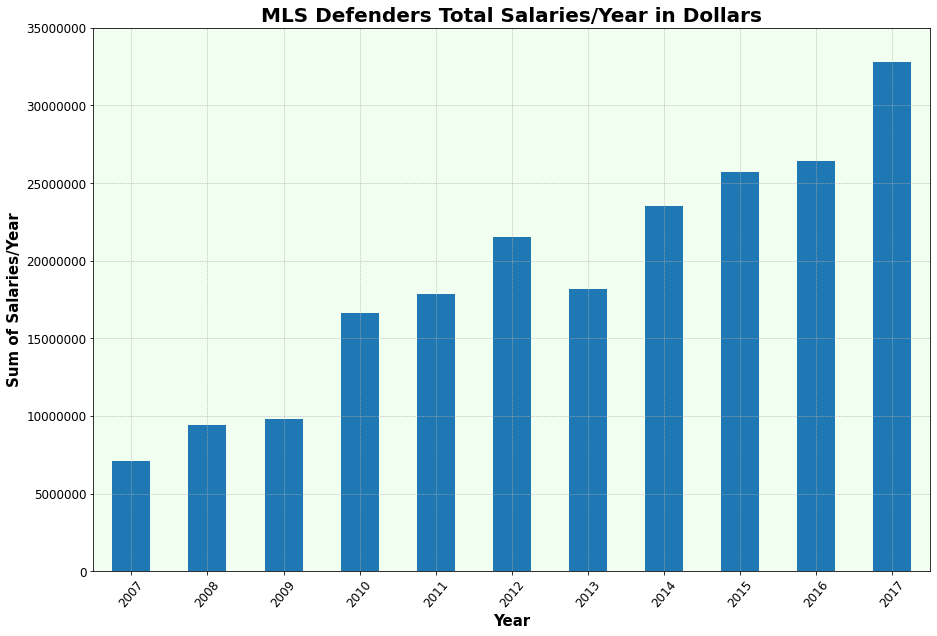

In [ ]:
#This graph is going to represent the D salaries from 2007-2017.
D_graph = pd.DataFrame({'Year':['2007', '2008', '2009', '2010', '2011', '2012', 
                                 '2013', '2014', '2015', '2016', '2017'], 'Salary'
                                 :[7070760.85, 9423866.62, 9775513.43, 16601872.97, 17823967.0, 
                                   21534705.95, 18175655.92, 23533773.13, 25674896.03, 26387530.81, 32760305.86]})
ax = D_graph.plot.bar(x = 'Year', y = 'Salary', rot = 50,  figsize = (15, 10))

plt.ticklabel_format(style='plain', axis='y')
plt.title('MLS Defenders Total Salaries/Year in Dollars', fontsize = 20, fontweight = 'bold');
plt.xlabel('Year', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 12);
plt.ylabel('Sum of Salaries/Year', fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 12);
plt.ylim(0, 35000000)
ax.set_facecolor('honeydew')
plt.grid(linestyle = '--', linewidth = 0.5)
ax.get_legend().remove()

plt.show()

##Interpretation of the Graph:
Similar to the Goalkeepers graph, the year that generated the highest salary for Defenders was in 2017. The total salary of Defeneders was roughly above 30,000,000.00 dollars but, if we wanted to be exact, in 2017 the total salary of Goalkeepers was 32,760,305.86 dollars. 
 

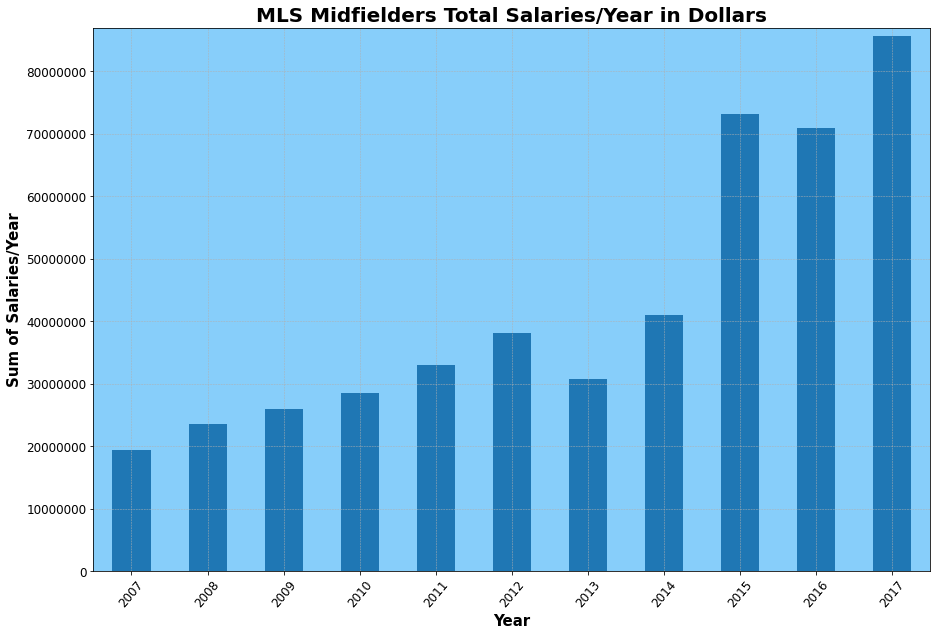

In [ ]:
#This graph is going to represent the M salaries from 2007-2017.
M_graph = pd.DataFrame({'Year':['2007', '2008', '2009', '2010', '2011', '2012', 
                                 '2013', '2014', '2015', '2016', '2017'], 'Salary'
                                 :[19357582.41, 23474752.75, 26028285.26, 28553760.2, 33053858.82, 
                                   38192936.12, 30707560.97, 41074803.45, 73164563.82, 70854407.82, 85662614.21]})
ax = M_graph.plot.bar(x = 'Year', y = 'Salary', rot = 50, figsize = (15, 10))

plt.ticklabel_format(style='plain', axis='y')
plt.title('MLS Midfielders Total Salaries/Year in Dollars', fontsize = 20, fontweight = 'bold');
plt.xlabel('Year', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 12);
plt.ylabel('Sum of Salaries/Year', fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 12);
plt.ylim(0, 87000000)
ax.set_facecolor('lightskyblue')
plt.grid(linestyle = '--', linewidth = 0.5)
ax.get_legend().remove()

plt.show()

##Interpretation of the Graph:
Similar to the Goalkeepers and Defenders graph, the year that generated the highest salary for Midfielders was in 2017. The total salary of Defeneders was roughly above 80,000,000.00 dollars but, if we wanted to be exact, in 2017 the total salary of Goalkeepers was 85,662,614.21 dollars. 
 

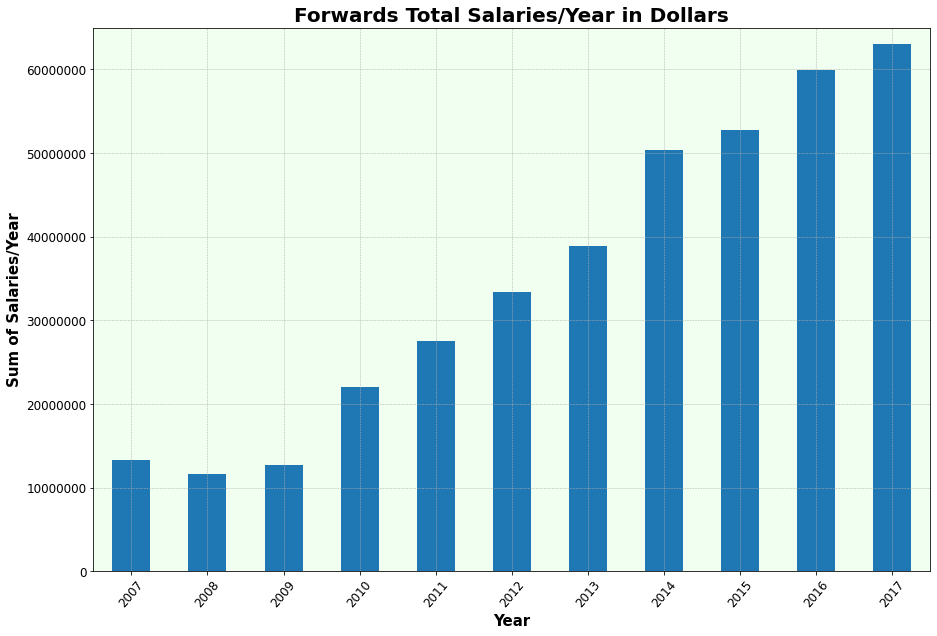

In [ ]:
#This graph is going to represent the F salaries from 2007-2017.
M_graph = pd.DataFrame({'Year':['2007', '2008', '2009', '2010', '2011', '2012', 
                                 '2013', '2014', '2015', '2016', '2017'], 'Salary'
                                 :[13275184.71, 11602794.89, 12726564.44, 22012559.54, 27562666.20, 
                                   33434759.67, 38911813.58, 50341870.21, 52794841.19, 59956217.33, 63045355.34]})
ax = M_graph.plot.bar(x = 'Year', y = 'Salary', rot = 50, figsize = (15, 10))

plt.ticklabel_format(style='plain', axis='y')
plt.title('Forwards Total Salaries/Year in Dollars', fontsize = 20, fontweight = 'bold');
plt.xlabel('Year', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 12);
plt.ylabel('Sum of Salaries/Year', fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 12);
plt.ylim(0, 65000000)
ax.set_facecolor('honeydew')
plt.grid(linestyle = '--', linewidth = 0.5)
ax.get_legend().remove()

plt.show()

##Interpretation of the Graph:
Similar to the Goalkeepers, Defenders, the year that generated the highest salary for Forwards was in 2017. The total salary of Forwards was roughly above 60,000,000.00 dollars but, if we wanted to be exact, in 2017 the total salary of Goalkeepers was 63,045,355.34 dollars. 


#Summary/Conclusion of Research Question 1:
Refering back to the Research question: 

-   Which year and position generated the highest total salary over the time period of 2007- 2017?

we are able to answer based on the results that the graphs provide. For all four graphs, 2017 was the year that had the highest total salaries for each position. To list them:

- Goalkeepers: 10,313,235.12 dollars
- Defenders: 32,760,305.86 dollars
- Midfielders: 85,662,614.21 dollars
- Forwards: 85,662,614.21 dollars

Therefore we can conclude that **2017** was the year that had the highest total salaries, and the position that generated the highest total salary were **Midfielders**.

#Research Question 2
The second research question is:

* Which player and in what year earned the highest salary over the the course of 2007-2017?


##Data Cleaning/Maniplualtion
For this research question the same data cleaning methods were applied. All the rows that contained missing values were dropped and the 'base_salary' column was dropped since we are not going to be using that column to answer this research question.

The main goal is to find the player who earned the highest salary over the course of 2007-2017. In order to find the highest salary earned by a soccer player the **max()** function was applied to the 'guarenteed_compensation' column in order to get the maximum value under the 'guarenteed_compensation'.

The **max()** function was then applied to all of the years to get the maximum value under the 'guarenteed_compensation' column.



In [ ]:
#Process:
#find the player that earned the highest each year and graph accordingly using 
#a scatter plot.

#2007 data
#Source:https://www.kite.com/python/answers/how-to-find-the-max-value-of-a-pandas-dataframe-column-in-python
player_salaries_07 = salaries_07.dropna() 
player_salaries_07.drop('base_salary', axis = 1, inplace = True)

col_07 = player_salaries_07["guaranteed_compensation"]
col_07
max_07 = col_07.max()
max_07

#2008 data
player_salaries_08 = salaries_08.dropna() 
player_salaries_08.drop('base_salary', axis = 1, inplace = True)

col_08 = player_salaries_08["guaranteed_compensation"]
col_08
max_08 = col_08.max()
max_08

#2009 data
player_salaries_09 = salaries_09.dropna() 
player_salaries_09.drop('base_salary', axis = 1, inplace = True)

col_09 = player_salaries_09["guaranteed_compensation"]
col_09
max_09 = col_09.max()
max_09

#2010 data
player_salaries_10 = salaries_10.dropna() 
player_salaries_10.drop('base_salary', axis = 1, inplace = True)

col_10 = player_salaries_10["guaranteed_compensation"]
col_10
max_10 = col_10.max()
max_10

#2011 data 
player_salaries_11 = salaries_11.dropna() 
player_salaries_11.drop('base_salary', axis = 1, inplace = True)

col_11 = player_salaries_11["guaranteed_compensation"]
col_11
max_11 = col_11.max()
max_11

#2012 data
player_salaries_12 = salaries_12.dropna() 
player_salaries_12.drop('base_salary', axis = 1, inplace = True)

col_12 = salaries_12["guaranteed_compensation"]
col_12
max_12 = col_12.max()
max_12

#2013 data
player_salaries_13 = salaries_13.dropna() 
player_salaries_13.drop('base_salary', axis = 1, inplace = True)

col_13 = player_salaries_13["guaranteed_compensation"]
col_13
max_13 = col_13.max()
max_13

#2014 data
player_salaries_14 = salaries_14.dropna() 
player_salaries_14.drop('base_salary', axis = 1, inplace = True)

col_14 = player_salaries_14["guaranteed_compensation"]
col_14
max_14 = col_14.max()
max_14

#2015 data
player_salaries_15 = salaries_15.dropna() 
player_salaries_15.drop('base_salary', axis = 1, inplace = True)

col_15 = player_salaries_15["guaranteed_compensation"]
col_15
max_15 = col_15.max()
max_15

#2016 data
player_salaries_16 = salaries_16.dropna() 
player_salaries_16.drop('base_salary', axis = 1, inplace = True)

col_16 = player_salaries_16["guaranteed_compensation"]
col_16
max_16 = col_16.max()
max_16

#2017 data
player_salaries_17 = salaries_17.dropna() 
player_salaries_17.drop('base_salary', axis = 1, inplace = True)

col_17 = player_salaries_17["guaranteed_compensation"]
col_17
max_17 = col_17.max()
max_17

In [13]:
max_17

7115555.67

In [ ]:

#D_07 = new_salaries_07[new_salaries_07['position'].isin(['D', 'F-D', 'D-F'])]  

0      2297000.00
1        65625.00
2       150000.00
3       106573.89
4        77400.00
          ...    
609     377000.00
610     194000.00
611      80000.00
612     368125.00
613     184000.00
Name: guaranteed_compensation, Length: 610, dtype: float64

##Research Question 2 Graphs:
A scatter plot was made in order to help answer research question 2. The graph is titled 'Highest Salary Earned by Player From 2007-2017'. 'Years' is on the x-axis and 'Salary in Dollars' is on the y-axis. 

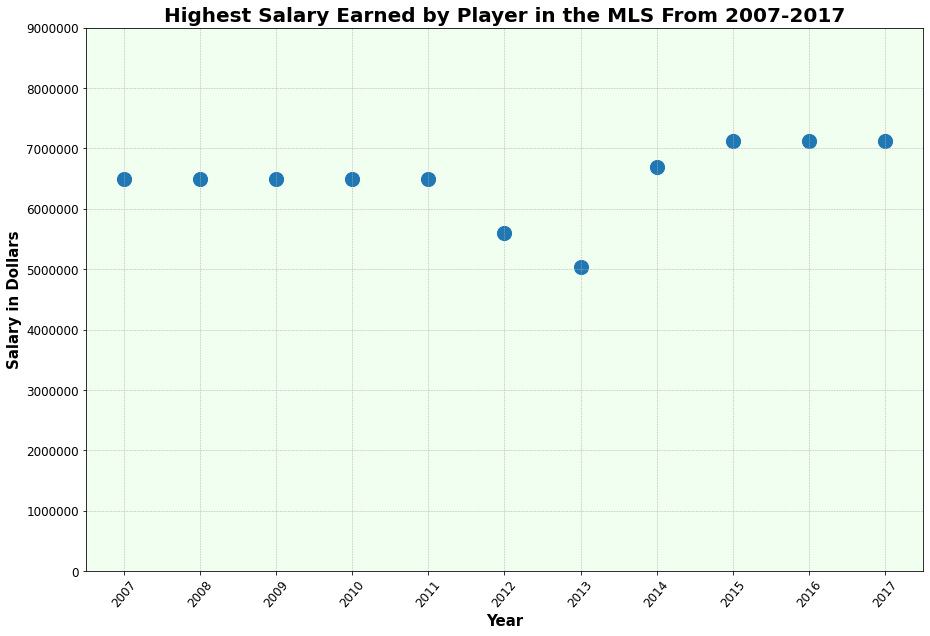

In [14]:
#x_max = ([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]) 
#y_max = ([6500000.04, 6500000.04, 6500000.04, 6500000.04, 6500000.04, 5600000.0, 5038566.5, 
          #7167500.0, 7167500.0, 7167500.0, 7167500.0 ])
graph = pd.DataFrame({'Year':['2007', '2008', '2009', '2010', '2011', '2012', 
                                 '2013', '2014', '2015', '2016', '2017'], 'Salary'
                                 :[max_07, max_08, max_09, max_10, max_11, max_12, max_13, 
                                  max_14, max_15, max_16, max_17 ]})
g = graph.plot.scatter(x = 'Year', y = 'Salary', rot = 50, figsize = (15, 10), s=200)

plt.ticklabel_format(style='plain', axis='y')
plt.title('Highest Salary Earned by Player in the MLS From 2007-2017', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year', fontsize = 15, fontweight = 'bold')
plt.xticks(fontsize = 12);
plt.ylabel('Salary in Dollars', fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 12)
plt.ylim(0, 9000000)
g.set_facecolor('honeydew')
plt.grid(linestyle = '--', linewidth = 0.5)

plt.show()


#Summary/Conclusion of Research Question 2:
Refering back to the Research question: 

-   Which player and in what year earned the highest salary over the the course of 2007-2017?

based on the scatter plot we are able to note that in 2015 through 2017 the salaries are the same. The reason why they are the same is because the player, 'Sebastian Giovinco' earned the highest salary of 7,115,555.67
 dollars for for those three years straight, according to the data.

#Research Question #3
The third research question is: 

- Comparativeley as a whole, are MLS Teams earning the same total salaries over the years or are there other noticable trends?



##Data Cleaning/Manipulation

The same methods of data cleaning were applied to the initial data set. All of the rows that contained missing data were dropped and the 'base_salary' column was dropped. 

In order to answer the research question, we need to look at the total sum of salaries of all of the the different teams in the players_salries_XX table. To get the total sum of the salaries of all 26 teams, a new table is created only containing a specific team. In order to do this the **.isin()** function is used. 

Once we have our new table created with a specific team we are working with under the 'club' column, we are then able to sum up the 'guaranteed_compensation' column using the **.sum()** funtion to help answer our research question. 

This was then applied to the 26 teams under the 'club' column for the years 2007 through 2017. It was a tedious process, and I am sure that there is another way to do the same thing in more efficient way but I wasn't sure how, so I went with what I knew.

In [ ]:
#The plan here is to find out how team salaries changed over time. We are going
#to do this by making a scatter plot consisting of the sum of each individual team
#per year. We are going to be displaying that changes over time in the same graph.
#The audience is going to be able to tell them apart by having each years data be 
#a different color. A legend will be added to help with the distinction.
player_salaries_07 = salaries_07.dropna() 
player_salaries_07.drop('base_salary', axis = 1, inplace = True)

#First, we will need to extract each team individually and calculate the total 
#sum of the 'guaranteed_compensation' column. We will do this by usng the 
#.isin function.
#2007 data:
ATL_07 = player_salaries_07[player_salaries_07['club'].isin(['ATL'])]
sum_ATL_07 = ATL_07['guaranteed_compensation'].sum()

CHI_07 = player_salaries_07[player_salaries_07['club'].isin(['CHI'])]  
sum_CHI_07 = CHI_07['guaranteed_compensation'].sum()

CHV_07 = player_salaries_07[player_salaries_07['club'].isin(['CHV'])] 
sum_CHV_07 = CHV_07['guaranteed_compensation'].sum()

CLB_07 = player_salaries_07[player_salaries_07['club'].isin(['CLB'])]  
sum_CLB_07 = CLB_07['guaranteed_compensation'].sum()

COL_07 = player_salaries_07[player_salaries_07['club'].isin(['COL'])]  
sum_COL_07 = COL_07['guaranteed_compensation'].sum()

DAL_07 = player_salaries_07[player_salaries_07['club'].isin(['DAL'])]  
sum_DAL_07 = DAL_07['guaranteed_compensation'].sum()

DC_07 = player_salaries_07[player_salaries_07['club'].isin(['DC'])] 
sum_DC_07 = DC_07['guaranteed_compensation'].sum()

HOU_07 = player_salaries_07[player_salaries_07['club'].isin(['HOU'])]  
sum_HOU_07 = HOU_07['guaranteed_compensation'].sum()

KC_07 = player_salaries_07[player_salaries_07['club'].isin(['KC'])]  
sum_KC_07 = KC_07['guaranteed_compensation'].sum()

LA_07 = player_salaries_07[player_salaries_07['club'].isin(['LA'])]  
sum_LA_07 = LA_07['guaranteed_compensation'].sum()

LAFC_07 = player_salaries_07[player_salaries_07['club'].isin(['LAFC'])] 
sum_LAFC_07 = LAFC_07['guaranteed_compensation'].sum()

MNUFC_07 = player_salaries_07[player_salaries_07['club'].isin(['MNUFC'])]
sum_MNUFC_07 = MNUFC_07['guaranteed_compensation'].sum()

MTL_07 = player_salaries_07[player_salaries_07['club'].isin(['MTL'])] 
sum_MTL_07 = MTL_07['guaranteed_compensation'].sum()

NE_07 = player_salaries_07[player_salaries_07['club'].isin(['NE'])]  
sum_NE_07 = NE_07['guaranteed_compensation'].sum()

NY_07 = player_salaries_07[player_salaries_07['club'].isin(['NY'])]
sum_NY_07 = NY_07['guaranteed_compensation'].sum()

NYCFC_07 = player_salaries_07[player_salaries_07['club'].isin(['NYCFC'])]
sum_NYCFC_07 = NYCFC_07['guaranteed_compensation'].sum()

NYRB_07 = player_salaries_07[player_salaries_07['club'].isin(['NYRB'])]  
sum_NYRB_07 = NYRB_07['guaranteed_compensation'].sum()

ORL_07 = player_salaries_07[player_salaries_07['club'].isin(['ORL'])]  
sum_ORL_07 = ORL_07['guaranteed_compensation'].sum()

PHI_07 = player_salaries_07[player_salaries_07['club'].isin(['PHI'])]  
sum_PHI_07 = PHI_07['guaranteed_compensation'].sum()

POR_07 = player_salaries_07[player_salaries_07['club'].isin(['POR'])]
sum_POR_07 = POR_07['guaranteed_compensation'].sum()

RSL_07 = player_salaries_07[player_salaries_07['club'].isin(['RSL'])]  
sum_RSL_07 = RSL_07['guaranteed_compensation'].sum()

SEA_07 = player_salaries_07[player_salaries_07['club'].isin(['SEA'])] 
sum_SEA_07 = SEA_07['guaranteed_compensation'].sum()

SJ_07 = player_salaries_07[player_salaries_07['club'].isin(['SJ'])]
sum_SJ_07 = SJ_07['guaranteed_compensation'].sum()

TFC_07 = player_salaries_07[player_salaries_07['club'].isin(['TFC'])]  
sum_TFC_07 = TFC_07['guaranteed_compensation'].sum()

TOR_07 = player_salaries_07[player_salaries_07['club'].isin(['TOR'])]  
sum_TOR_07 = TOR_07['guaranteed_compensation'].sum()

VAN_07 = player_salaries_07[player_salaries_07['club'].isin(['VAN'])] 
sum_VAN_07 = VAN_07['guaranteed_compensation'].sum()

#2008 data:
player_salaries_08 = salaries_08.dropna() 
player_salaries_08.drop('base_salary', axis = 1, inplace = True)

ATL_08 = player_salaries_08[player_salaries_08['club'].isin(['ATL'])]
sum_ATL_08 = ATL_08['guaranteed_compensation'].sum()

CHI_08 = player_salaries_08[player_salaries_08['club'].isin(['CHI'])]  
sum_CHI_08 = CHI_08['guaranteed_compensation'].sum()

CHV_08 = player_salaries_08[player_salaries_08['club'].isin(['CHV'])] 
sum_CHV_08 = CHV_08['guaranteed_compensation'].sum()

CLB_08 = player_salaries_08[player_salaries_08['club'].isin(['CLB'])]  
sum_CLB_08 = CLB_08['guaranteed_compensation'].sum()

COL_08 = player_salaries_08[player_salaries_08['club'].isin(['COL'])]  
sum_COL_08 = COL_08['guaranteed_compensation'].sum()

DAL_08 = player_salaries_08[player_salaries_08['club'].isin(['DAL'])]  
sum_DAL_08 = DAL_08['guaranteed_compensation'].sum()

DC_08 = player_salaries_08[player_salaries_08['club'].isin(['DC'])] 
sum_DC_08 = DC_08['guaranteed_compensation'].sum()

HOU_08 = player_salaries_08[player_salaries_08['club'].isin(['HOU'])]  
sum_HOU_08 = HOU_08['guaranteed_compensation'].sum()

KC_08 = player_salaries_08[player_salaries_08['club'].isin(['KC'])]  
sum_KC_08 = KC_08['guaranteed_compensation'].sum()

LA_08 = player_salaries_08[player_salaries_08['club'].isin(['LA'])]  
sum_LA_08 = LA_08['guaranteed_compensation'].sum()

LAFC_08 = player_salaries_08[player_salaries_08['club'].isin(['LAFC'])] 
sum_LAFC_08 = LAFC_08['guaranteed_compensation'].sum()

MNUFC_08 = player_salaries_08[player_salaries_08['club'].isin(['MNUFC'])]
sum_MNUFC_08 = MNUFC_08['guaranteed_compensation'].sum()

MTL_08 = player_salaries_08[player_salaries_08['club'].isin(['MTL'])] 
sum_MTL_08 = MTL_08['guaranteed_compensation'].sum()

NE_08 = player_salaries_08[player_salaries_08['club'].isin(['NE'])]  
sum_NE_08 = NE_08['guaranteed_compensation'].sum()

NY_08 = player_salaries_08[player_salaries_08['club'].isin(['NY'])]
sum_NY_08 = NY_08['guaranteed_compensation'].sum()

NYCFC_08 = player_salaries_08[player_salaries_08['club'].isin(['NYCFC'])]
sum_NYCFC_08 = NYCFC_08['guaranteed_compensation'].sum()

NYRB_08 = player_salaries_08[player_salaries_08['club'].isin(['NYRB'])]  
sum_NYRB_08 = NYRB_08['guaranteed_compensation'].sum()

ORL_08 = player_salaries_08[player_salaries_08['club'].isin(['ORL'])]  
sum_ORL_08 = ORL_08['guaranteed_compensation'].sum()

PHI_08 = player_salaries_08[player_salaries_08['club'].isin(['PHI'])]  
sum_PHI_08 = PHI_08['guaranteed_compensation'].sum()

POR_08 = player_salaries_08[player_salaries_08['club'].isin(['POR'])]
sum_POR_08 = POR_08['guaranteed_compensation'].sum()

RSL_08 = player_salaries_08[player_salaries_08['club'].isin(['RSL'])]  
sum_RSL_08 = RSL_08['guaranteed_compensation'].sum()

SEA_08 = player_salaries_08[player_salaries_08['club'].isin(['SEA'])] 
sum_SEA_08 = SEA_07['guaranteed_compensation'].sum()

SJ_08 = player_salaries_08[player_salaries_08['club'].isin(['SJ'])]
sum_SJ_08 = SJ_08['guaranteed_compensation'].sum()

TFC_08 = player_salaries_08[player_salaries_08['club'].isin(['TFC'])]  
sum_TFC_08 = TFC_08['guaranteed_compensation'].sum()

TOR_08 = player_salaries_08[player_salaries_08['club'].isin(['TOR'])]  
sum_TOR_08 = TOR_08['guaranteed_compensation'].sum()

VAN_08 = player_salaries_08[player_salaries_08['club'].isin(['VAN'])] 
sum_VAN_08 = VAN_08['guaranteed_compensation'].sum()

#2009 data:
player_salaries_09 = salaries_09.dropna() 
player_salaries_09.drop('base_salary', axis = 1, inplace = True)

ATL_09 = player_salaries_09[player_salaries_09['club'].isin(['ATL'])]
sum_ATL_09 = ATL_09['guaranteed_compensation'].sum()

CHI_09 = player_salaries_09[player_salaries_09['club'].isin(['CHI'])]  
sum_CHI_09 = CHI_09['guaranteed_compensation'].sum()

CHV_09 = player_salaries_09[player_salaries_09['club'].isin(['CHV'])] 
sum_CHV_09 = CHV_09['guaranteed_compensation'].sum()

CLB_09 = player_salaries_09[player_salaries_09['club'].isin(['CLB'])]  
sum_CLB_09 = CLB_09['guaranteed_compensation'].sum()

COL_09 = player_salaries_09[player_salaries_09['club'].isin(['COL'])]  
sum_COL_09 = COL_09['guaranteed_compensation'].sum()

DAL_09 = player_salaries_09[player_salaries_09['club'].isin(['DAL'])]  
sum_DAL_09 = DAL_09['guaranteed_compensation'].sum()

DC_09 = player_salaries_09[player_salaries_09['club'].isin(['DC'])] 
sum_DC_09 = DC_09['guaranteed_compensation'].sum()

HOU_09 = player_salaries_09[player_salaries_09['club'].isin(['HOU'])]  
sum_HOU_09 = HOU_09['guaranteed_compensation'].sum()

KC_09 = player_salaries_09[player_salaries_09['club'].isin(['KC'])]  
sum_KC_09 = KC_09['guaranteed_compensation'].sum()

LA_09 = player_salaries_09[player_salaries_09['club'].isin(['LA'])]  
sum_LA_09 = LA_09['guaranteed_compensation'].sum()

LAFC_09 = player_salaries_09[player_salaries_09['club'].isin(['LAFC'])] 
sum_LAFC_09 = LAFC_09['guaranteed_compensation'].sum()

MNUFC_09 = player_salaries_09[player_salaries_09['club'].isin(['MNUFC'])]
sum_MNUFC_09 = MNUFC_09['guaranteed_compensation'].sum()

MTL_09 = player_salaries_09[player_salaries_09['club'].isin(['MTL'])] 
sum_MTL_09 = MTL_09['guaranteed_compensation'].sum()

NE_09 = player_salaries_09[player_salaries_09['club'].isin(['NE'])]  
sum_NE_09 = NE_09['guaranteed_compensation'].sum()

NY_09 = player_salaries_09[player_salaries_09['club'].isin(['NY'])]
sum_NY_09 = NY_09['guaranteed_compensation'].sum()

NYCFC_09 = player_salaries_09[player_salaries_09['club'].isin(['NYCFC'])]
sum_NYCFC_09 = NYCFC_09['guaranteed_compensation'].sum()

NYRB_09 = player_salaries_09[player_salaries_09['club'].isin(['NYRB'])]  
sum_NYRB_09 = NYRB_09['guaranteed_compensation'].sum()

ORL_09 = player_salaries_09[player_salaries_09['club'].isin(['ORL'])]  
sum_ORL_09 = ORL_09['guaranteed_compensation'].sum()

PHI_09 = player_salaries_09[player_salaries_09['club'].isin(['PHI'])]  
sum_PHI_09 = PHI_08['guaranteed_compensation'].sum()

POR_09 = player_salaries_09[player_salaries_09['club'].isin(['POR'])]
sum_POR_09 = POR_09['guaranteed_compensation'].sum()

RSL_09 = player_salaries_09[player_salaries_09['club'].isin(['RSL'])]  
sum_RSL_09 = RSL_09['guaranteed_compensation'].sum()

SEA_09 = player_salaries_09[player_salaries_09['club'].isin(['SEA'])] 
sum_SEA_09 = SEA_09['guaranteed_compensation'].sum()

SJ_09 = player_salaries_09[player_salaries_09['club'].isin(['SJ'])]
sum_SJ_09 = SJ_09['guaranteed_compensation'].sum()

TFC_09 = player_salaries_09[player_salaries_09['club'].isin(['TFC'])]  
sum_TFC_09 = TFC_09['guaranteed_compensation'].sum()

TOR_09 = player_salaries_09[player_salaries_09['club'].isin(['TOR'])]  
sum_TOR_09 = TOR_09['guaranteed_compensation'].sum()

VAN_09 = player_salaries_09[player_salaries_09['club'].isin(['VAN'])] 
sum_VAN_09 = VAN_09['guaranteed_compensation'].sum()

#2010 data:
player_salaries_10 = salaries_10.dropna() 
player_salaries_10.drop('base_salary', axis = 1, inplace = True)

ATL_10 = player_salaries_10[player_salaries_10['club'].isin(['ATL'])]
sum_ATL_10 = ATL_10['guaranteed_compensation'].sum()

CHI_10 = player_salaries_10[player_salaries_10['club'].isin(['CHI'])]  
sum_CHI_10 = CHI_10['guaranteed_compensation'].sum()

CHV_10 = player_salaries_10[player_salaries_10['club'].isin(['CHV'])] 
sum_CHV_10 = CHV_10['guaranteed_compensation'].sum()

CLB_10 = player_salaries_10[player_salaries_10['club'].isin(['CLB'])]  
sum_CLB_10 = CLB_10['guaranteed_compensation'].sum()

COL_10 = player_salaries_10[player_salaries_10['club'].isin(['COL'])]  
sum_COL_10 = COL_10['guaranteed_compensation'].sum()

DAL_10 = player_salaries_10[player_salaries_10['club'].isin(['DAL'])]  
sum_DAL_10 = DAL_10['guaranteed_compensation'].sum()

DC_10 = player_salaries_10[player_salaries_10['club'].isin(['DC'])] 
sum_DC_10 = DC_10['guaranteed_compensation'].sum()

HOU_10 = player_salaries_10[player_salaries_10['club'].isin(['HOU'])]  
sum_HOU_10 = HOU_10['guaranteed_compensation'].sum()

KC_10 = player_salaries_10[player_salaries_10['club'].isin(['KC'])]  
sum_KC_10 = KC_10['guaranteed_compensation'].sum()

LA_10 = player_salaries_10[player_salaries_10['club'].isin(['LA'])]  
sum_LA_10 = LA_10['guaranteed_compensation'].sum()

LAFC_10 = player_salaries_10[player_salaries_10['club'].isin(['LAFC'])] 
sum_LAFC_10 = LAFC_10['guaranteed_compensation'].sum()

MNUFC_10 = player_salaries_10[player_salaries_10['club'].isin(['MNUFC'])]
sum_MNUFC_10 = MNUFC_10['guaranteed_compensation'].sum()

MTL_10 = player_salaries_10[player_salaries_10['club'].isin(['MTL'])] 
sum_MTL_10 = MTL_10['guaranteed_compensation'].sum()

NE_10 = player_salaries_10[player_salaries_10['club'].isin(['NE'])]  
sum_NE_10 = NE_10['guaranteed_compensation'].sum()

NY_10 = player_salaries_10[player_salaries_10['club'].isin(['NY'])]
sum_NY_10 = NY_10['guaranteed_compensation'].sum()

NYCFC_10 = player_salaries_10[player_salaries_10['club'].isin(['NYCFC'])]
sum_NYCFC_10 = NYCFC_10['guaranteed_compensation'].sum()

NYRB_10 = player_salaries_10[player_salaries_10['club'].isin(['NYRB'])]  
sum_NYRB_10 = NYRB_10['guaranteed_compensation'].sum()

ORL_10 = player_salaries_10[player_salaries_10['club'].isin(['ORL'])]  
sum_ORL_10 = ORL_10['guaranteed_compensation'].sum()

PHI_10 = player_salaries_10[player_salaries_10['club'].isin(['PHI'])]  
sum_PHI_10 = PHI_10['guaranteed_compensation'].sum()

POR_10 = player_salaries_10[player_salaries_10['club'].isin(['POR'])]
sum_POR_10 = POR_10['guaranteed_compensation'].sum()

RSL_10 = player_salaries_10[player_salaries_10['club'].isin(['RSL'])]  
sum_RSL_10 = RSL_10['guaranteed_compensation'].sum()

SEA_10 = player_salaries_10[player_salaries_10['club'].isin(['SEA'])] 
sum_SEA_10 = SEA_10['guaranteed_compensation'].sum()

SJ_10 = player_salaries_10[player_salaries_10['club'].isin(['SJ'])]
sum_SJ_10 = SJ_10['guaranteed_compensation'].sum()

TFC_10 = player_salaries_10[player_salaries_10['club'].isin(['TFC'])]  
sum_TFC_10 = TFC_10['guaranteed_compensation'].sum()

TOR_10 = player_salaries_10[player_salaries_10['club'].isin(['TOR'])]  
sum_TOR_10 = TOR_10['guaranteed_compensation'].sum()

VAN_10 = player_salaries_10[player_salaries_10['club'].isin(['VAN'])] 
sum_VAN_10 = VAN_10['guaranteed_compensation'].sum()

#2011 data:
player_salaries_11 = salaries_11.dropna() 
player_salaries_11.drop('base_salary', axis = 1, inplace = True)

ATL_11 = player_salaries_11[player_salaries_11['club'].isin(['ATL'])]
sum_ATL_11 = ATL_11['guaranteed_compensation'].sum()

CHI_11 = player_salaries_11[player_salaries_11['club'].isin(['CHI'])]  
sum_CHI_11 = CHI_11['guaranteed_compensation'].sum()

CHV_11 = player_salaries_11[player_salaries_11['club'].isin(['CHV'])] 
sum_CHV_11 = CHV_11['guaranteed_compensation'].sum()

CLB_11 = player_salaries_11[player_salaries_11['club'].isin(['CLB'])]  
sum_CLB_11 = CLB_11['guaranteed_compensation'].sum()

COL_11 = player_salaries_11[player_salaries_11['club'].isin(['COL'])]  
sum_COL_11 = COL_11['guaranteed_compensation'].sum()

DAL_11 = player_salaries_11[player_salaries_11['club'].isin(['DAL'])]  
sum_DAL_11 = DAL_11['guaranteed_compensation'].sum()

DC_11 = player_salaries_11[player_salaries_11['club'].isin(['DC'])] 
sum_DC_11 = DC_11['guaranteed_compensation'].sum()

HOU_11 = player_salaries_11[player_salaries_11['club'].isin(['HOU'])]  
sum_HOU_11 = HOU_11['guaranteed_compensation'].sum()

KC_11 = player_salaries_11[player_salaries_11['club'].isin(['KC'])]  
sum_KC_11 = KC_11['guaranteed_compensation'].sum()

LA_11 = player_salaries_11[player_salaries_11['club'].isin(['LA'])]  
sum_LA_11 = LA_11['guaranteed_compensation'].sum()

LAFC_11 = player_salaries_11[player_salaries_11['club'].isin(['LAFC'])] 
sum_LAFC_11 = LAFC_11['guaranteed_compensation'].sum()

MNUFC_11 = player_salaries_11[player_salaries_11['club'].isin(['MNUFC'])]
sum_MNUFC_11 = MNUFC_11['guaranteed_compensation'].sum()

MTL_11 = player_salaries_11[player_salaries_11['club'].isin(['MTL'])] 
sum_MTL_11 = MTL_11['guaranteed_compensation'].sum()

NE_11 = player_salaries_11[player_salaries_11['club'].isin(['NE'])]  
sum_NE_11 = NE_11['guaranteed_compensation'].sum()

NY_11 = player_salaries_11[player_salaries_11['club'].isin(['NY'])]
sum_NY_11 = NY_11['guaranteed_compensation'].sum()

NYCFC_11 = player_salaries_11[player_salaries_11['club'].isin(['NYCFC'])]
sum_NYCFC_11 = NYCFC_11['guaranteed_compensation'].sum()

NYRB_11 = player_salaries_11[player_salaries_11['club'].isin(['NYRB'])]  
sum_NYRB_11 = NYRB_11['guaranteed_compensation'].sum()

ORL_11 = player_salaries_11[player_salaries_11['club'].isin(['ORL'])]  
sum_ORL_11 = ORL_11['guaranteed_compensation'].sum()

PHI_11 = player_salaries_11[player_salaries_11['club'].isin(['PHI'])]  
sum_PHI_11 = PHI_11['guaranteed_compensation'].sum()

POR_11 = player_salaries_11[player_salaries_11['club'].isin(['POR'])]
sum_POR_11 = POR_11['guaranteed_compensation'].sum()

RSL_11 = player_salaries_11[player_salaries_11['club'].isin(['RSL'])]  
sum_RSL_11 = RSL_11['guaranteed_compensation'].sum()

SEA_11 = player_salaries_11[player_salaries_11['club'].isin(['SEA'])] 
sum_SEA_11 = SEA_11['guaranteed_compensation'].sum()

SJ_11 = player_salaries_11[player_salaries_11['club'].isin(['SJ'])]
sum_SJ_11 = SJ_11['guaranteed_compensation'].sum()

TFC_11 = player_salaries_11[player_salaries_11['club'].isin(['TFC'])]  
sum_TFC_11 = TFC_11['guaranteed_compensation'].sum()

TOR_11 = player_salaries_11[player_salaries_11['club'].isin(['TOR'])]  
sum_TOR_11 = TOR_11['guaranteed_compensation'].sum()

VAN_11 = player_salaries_11[player_salaries_11['club'].isin(['VAN'])] 
sum_VAN_11 = VAN_11['guaranteed_compensation'].sum()

#2012 Data:
player_salaries_12 = salaries_12.dropna() 
player_salaries_12.drop('base_salary', axis = 1, inplace = True)

ATL_12 = player_salaries_12[player_salaries_12['club'].isin(['ATL'])]
sum_ATL_12 = ATL_12['guaranteed_compensation'].sum()

CHI_12 = player_salaries_12[player_salaries_12['club'].isin(['CHI'])]  
sum_CHI_12 = CHI_12['guaranteed_compensation'].sum()

CHV_12 = player_salaries_12[player_salaries_12['club'].isin(['CHV'])] 
sum_CHV_12 = CHV_12['guaranteed_compensation'].sum()

CLB_12 = player_salaries_12[player_salaries_12['club'].isin(['CLB'])]  
sum_CLB_12 = CLB_12['guaranteed_compensation'].sum()

COL_12 = player_salaries_12[player_salaries_12['club'].isin(['COL'])]  
sum_COL_12 = COL_12['guaranteed_compensation'].sum()

DAL_12 = player_salaries_12[player_salaries_12['club'].isin(['DAL'])]  
sum_DAL_12 = DAL_12['guaranteed_compensation'].sum()

DC_12 = player_salaries_12[player_salaries_12['club'].isin(['DC'])] 
sum_DC_12 = DC_12['guaranteed_compensation'].sum()

HOU_12 = player_salaries_12[player_salaries_12['club'].isin(['HOU'])]  
sum_HOU_12 = HOU_12['guaranteed_compensation'].sum()

KC_12 = player_salaries_12[player_salaries_12['club'].isin(['KC'])]  
sum_KC_12 = KC_12['guaranteed_compensation'].sum()

LA_12 = player_salaries_12[player_salaries_12['club'].isin(['LA'])]  
sum_LA_12 = LA_12['guaranteed_compensation'].sum()

LAFC_12 = player_salaries_12[player_salaries_12['club'].isin(['LAFC'])] 
sum_LAFC_12 = LAFC_12['guaranteed_compensation'].sum()

MNUFC_12 = player_salaries_12[player_salaries_12['club'].isin(['MNUFC'])]
sum_MNUFC_12 = MNUFC_12['guaranteed_compensation'].sum()

MTL_12 = player_salaries_12[player_salaries_12['club'].isin(['MTL'])] 
sum_MTL_12 = MTL_12['guaranteed_compensation'].sum()

NE_12 = player_salaries_12[player_salaries_12['club'].isin(['NE'])]  
sum_NE_12 = NE_12['guaranteed_compensation'].sum()

NY_12 = player_salaries_12[player_salaries_12['club'].isin(['NY'])]
sum_NY_12 = NY_12['guaranteed_compensation'].sum()

NYCFC_12 = player_salaries_12[player_salaries_12['club'].isin(['NYCFC'])]
sum_NYCFC_12 = NYCFC_12['guaranteed_compensation'].sum()

NYRB_12 = player_salaries_12[player_salaries_12['club'].isin(['NYRB'])]  
sum_NYRB_12 = NYRB_12['guaranteed_compensation'].sum()

ORL_12 = player_salaries_12[player_salaries_12['club'].isin(['ORL'])]  
sum_ORL_12 = ORL_12['guaranteed_compensation'].sum()

PHI_12 = player_salaries_12[player_salaries_12['club'].isin(['PHI'])]  
sum_PHI_12 = PHI_12['guaranteed_compensation'].sum()

POR_12 = player_salaries_12[player_salaries_12['club'].isin(['POR'])]
sum_POR_12 = POR_12['guaranteed_compensation'].sum()

RSL_12 = player_salaries_12[player_salaries_12['club'].isin(['RSL'])]  
sum_RSL_12 = RSL_12['guaranteed_compensation'].sum()

SEA_12 = player_salaries_12[player_salaries_12['club'].isin(['SEA'])] 
sum_SEA_12 = SEA_12['guaranteed_compensation'].sum()

SJ_12 = player_salaries_12[player_salaries_12['club'].isin(['SJ'])]
sum_SJ_12 = SJ_12['guaranteed_compensation'].sum()

TFC_12 = player_salaries_12[player_salaries_12['club'].isin(['TFC'])]  
sum_TFC_12 = TFC_12['guaranteed_compensation'].sum()

TOR_12 = player_salaries_12[player_salaries_12['club'].isin(['TOR'])]  
sum_TOR_12 = TOR_12['guaranteed_compensation'].sum()

VAN_12 = player_salaries_12[player_salaries_12['club'].isin(['VAN'])] 
sum_VAN_12 = VAN_12['guaranteed_compensation'].sum()

#2013 Data:
player_salaries_13 = salaries_13.dropna() 
player_salaries_13.drop('base_salary', axis = 1, inplace = True)

ATL_13 = player_salaries_13[player_salaries_13['club'].isin(['ATL'])]
sum_ATL_13 = ATL_13['guaranteed_compensation'].sum()

CHI_13 = player_salaries_13[player_salaries_13['club'].isin(['CHI'])]  
sum_CHI_13 = CHI_13['guaranteed_compensation'].sum()

CHV_13 = player_salaries_13[player_salaries_13['club'].isin(['CHV'])] 
sum_CHV_13 = CHV_13['guaranteed_compensation'].sum()

CLB_13 = player_salaries_13[player_salaries_13['club'].isin(['CLB'])]  
sum_CLB_13 = CLB_13['guaranteed_compensation'].sum()

COL_13 = player_salaries_13[player_salaries_13['club'].isin(['COL'])]  
sum_COL_13 = COL_13['guaranteed_compensation'].sum()

DAL_13 = player_salaries_13[player_salaries_13['club'].isin(['DAL'])]  
sum_DAL_13 = DAL_13['guaranteed_compensation'].sum()

DC_13 = player_salaries_13[player_salaries_13['club'].isin(['DC'])] 
sum_DC_13 = DC_13['guaranteed_compensation'].sum()

HOU_13 = player_salaries_13[player_salaries_13['club'].isin(['HOU'])]  
sum_HOU_13 = HOU_13['guaranteed_compensation'].sum()

KC_13 = player_salaries_13[player_salaries_13['club'].isin(['KC'])]  
sum_KC_13 = KC_13['guaranteed_compensation'].sum()

LA_13 = player_salaries_13[player_salaries_13['club'].isin(['LA'])]  
sum_LA_13 = LA_13['guaranteed_compensation'].sum()

LAFC_13 = player_salaries_13[player_salaries_13['club'].isin(['LAFC'])] 
sum_LAFC_13 = LAFC_13['guaranteed_compensation'].sum()

MNUFC_13 = player_salaries_13[player_salaries_13['club'].isin(['MNUFC'])]
sum_MNUFC_13 = MNUFC_13['guaranteed_compensation'].sum()

MTL_13 = player_salaries_13[player_salaries_13['club'].isin(['MTL'])] 
sum_MTL_13 = MTL_13['guaranteed_compensation'].sum()

NE_13 = player_salaries_13[player_salaries_13['club'].isin(['NE'])]  
sum_NE_13 = NE_13['guaranteed_compensation'].sum()

NY_13 = player_salaries_13[player_salaries_13['club'].isin(['NY'])]
sum_NY_13 = NY_13['guaranteed_compensation'].sum()

NYCFC_13 = player_salaries_13[player_salaries_13['club'].isin(['NYCFC'])]
sum_NYCFC_13 = NYCFC_13['guaranteed_compensation'].sum()

NYRB_13 = player_salaries_13[player_salaries_13['club'].isin(['NYRB'])]  
sum_NYRB_13 = NYRB_13['guaranteed_compensation'].sum()

ORL_13 = player_salaries_13[player_salaries_13['club'].isin(['ORL'])]  
sum_ORL_13 = ORL_13['guaranteed_compensation'].sum()

PHI_13 = player_salaries_13[player_salaries_13['club'].isin(['PHI'])]  
sum_PHI_13 = PHI_13['guaranteed_compensation'].sum()

POR_13 = player_salaries_13[player_salaries_13['club'].isin(['POR'])]
sum_POR_13 = POR_13['guaranteed_compensation'].sum()

RSL_13 = player_salaries_13[player_salaries_13['club'].isin(['RSL'])]  
sum_RSL_13 = RSL_13['guaranteed_compensation'].sum()

SEA_13 = player_salaries_13[player_salaries_13['club'].isin(['SEA'])] 
sum_SEA_13 = SEA_13['guaranteed_compensation'].sum()

SJ_13 = player_salaries_13[player_salaries_13['club'].isin(['SJ'])]
sum_SJ_13 = SJ_13['guaranteed_compensation'].sum()

TFC_13 = player_salaries_13[player_salaries_13['club'].isin(['TFC'])]  
sum_TFC_13 = TFC_13['guaranteed_compensation'].sum()

TOR_13 = player_salaries_13[player_salaries_13['club'].isin(['TOR'])]  
sum_TOR_13 = TOR_13['guaranteed_compensation'].sum()

VAN_13 = player_salaries_13[player_salaries_13['club'].isin(['VAN'])] 
sum_VAN_13 = VAN_13['guaranteed_compensation'].sum()

#2014 Data:
player_salaries_14 = salaries_14.dropna() 
player_salaries_14.drop('base_salary', axis = 1, inplace = True)

ATL_14 = player_salaries_14[player_salaries_14['club'].isin(['ATL'])]
sum_ATL_14 = ATL_14['guaranteed_compensation'].sum()

CHI_14 = player_salaries_14[player_salaries_14['club'].isin(['CHI'])]  
sum_CHI_14 = CHI_14['guaranteed_compensation'].sum()

CHV_14 = player_salaries_14[player_salaries_14['club'].isin(['CHV'])] 
sum_CHV_14 = CHV_14['guaranteed_compensation'].sum()

CLB_14 = player_salaries_14[player_salaries_14['club'].isin(['CLB'])]  
sum_CLB_14 = CLB_14['guaranteed_compensation'].sum()

COL_14 = player_salaries_14[player_salaries_14['club'].isin(['COL'])]  
sum_COL_14 = COL_14['guaranteed_compensation'].sum()

DAL_14 = player_salaries_14[player_salaries_14['club'].isin(['DAL'])]  
sum_DAL_14 = DAL_14['guaranteed_compensation'].sum()

DC_14 = player_salaries_14[player_salaries_14['club'].isin(['DC'])] 
sum_DC_14 = DC_14['guaranteed_compensation'].sum()

HOU_14 = player_salaries_14[player_salaries_14['club'].isin(['HOU'])]  
sum_HOU_14 = HOU_14['guaranteed_compensation'].sum()

KC_14 = player_salaries_14[player_salaries_14['club'].isin(['KC'])]  
sum_KC_14 = KC_14['guaranteed_compensation'].sum()

LA_14 = player_salaries_14[player_salaries_14['club'].isin(['LA'])]  
sum_LA_14 = LA_14['guaranteed_compensation'].sum()

LAFC_14 = player_salaries_14[player_salaries_14['club'].isin(['LAFC'])] 
sum_LAFC_14 = LAFC_14['guaranteed_compensation'].sum()

MNUFC_14 = player_salaries_14[player_salaries_14['club'].isin(['MNUFC'])]
sum_MNUFC_14 = MNUFC_14['guaranteed_compensation'].sum()

MTL_14 = player_salaries_14[player_salaries_14['club'].isin(['MTL'])] 
sum_MTL_14 = MTL_14['guaranteed_compensation'].sum()

NE_14 = player_salaries_14[player_salaries_14['club'].isin(['NE'])]  
sum_NE_14 = NE_14['guaranteed_compensation'].sum()

NY_14 = player_salaries_14[player_salaries_14['club'].isin(['NY'])]
sum_NY_14 = NY_14['guaranteed_compensation'].sum()

NYCFC_14 = player_salaries_14[player_salaries_14['club'].isin(['NYCFC'])]
sum_NYCFC_14 = NYCFC_14['guaranteed_compensation'].sum()

NYRB_14 = player_salaries_14[player_salaries_14['club'].isin(['NYRB'])]  
sum_NYRB_14 = NYRB_14['guaranteed_compensation'].sum()

ORL_14 = player_salaries_14[player_salaries_14['club'].isin(['ORL'])]  
sum_ORL_14 = ORL_14['guaranteed_compensation'].sum()

PHI_14 = player_salaries_14[player_salaries_14['club'].isin(['PHI'])]  
sum_PHI_14 = PHI_14['guaranteed_compensation'].sum()

POR_14 = player_salaries_14[player_salaries_14['club'].isin(['POR'])]
sum_POR_14 = POR_14['guaranteed_compensation'].sum()

RSL_14 = player_salaries_14[player_salaries_14['club'].isin(['RSL'])]  
sum_RSL_14 = RSL_14['guaranteed_compensation'].sum()

SEA_14 = player_salaries_14[player_salaries_14['club'].isin(['SEA'])] 
sum_SEA_14 = SEA_14['guaranteed_compensation'].sum()

SJ_14 = player_salaries_14[player_salaries_14['club'].isin(['SJ'])]
sum_SJ_14 = SJ_14['guaranteed_compensation'].sum()

TFC_14 = player_salaries_14[player_salaries_14['club'].isin(['TFC'])]  
sum_TFC_14 = TFC_14['guaranteed_compensation'].sum()

TOR_14 = player_salaries_14[player_salaries_14['club'].isin(['TOR'])]  
sum_TOR_14 = TOR_14['guaranteed_compensation'].sum()

VAN_14 = player_salaries_14[player_salaries_14['club'].isin(['VAN'])] 
sum_VAN_14 = VAN_14['guaranteed_compensation'].sum()

#2015 Data:
player_salaries_15 = salaries_15.dropna() 
player_salaries_15.drop('base_salary', axis = 1, inplace = True)

ATL_15 = player_salaries_15[player_salaries_15['club'].isin(['ATL'])]
sum_ATL_15 = ATL_15['guaranteed_compensation'].sum()

CHI_15 = player_salaries_15[player_salaries_15['club'].isin(['CHI'])]  
sum_CHI_15 = CHI_15['guaranteed_compensation'].sum()

CHV_15 = player_salaries_15[player_salaries_15['club'].isin(['CHV'])] 
sum_CHV_15 = CHV_15['guaranteed_compensation'].sum()

CLB_15 = player_salaries_15[player_salaries_15['club'].isin(['CLB'])]  
sum_CLB_15 = CLB_15['guaranteed_compensation'].sum()

COL_15 = player_salaries_15[player_salaries_15['club'].isin(['COL'])]  
sum_COL_15 = COL_15['guaranteed_compensation'].sum()

DAL_15 = player_salaries_15[player_salaries_15['club'].isin(['DAL'])]  
sum_DAL_15 = DAL_15['guaranteed_compensation'].sum()

DC_15 = player_salaries_15[player_salaries_15['club'].isin(['DC'])] 
sum_DC_15 = DC_15['guaranteed_compensation'].sum()

HOU_15 = player_salaries_15[player_salaries_15['club'].isin(['HOU'])]  
sum_HOU_15 = HOU_15['guaranteed_compensation'].sum()

KC_15 = player_salaries_15[player_salaries_15['club'].isin(['KC'])]  
sum_KC_15 = KC_15['guaranteed_compensation'].sum()

LA_15 = player_salaries_15[player_salaries_15['club'].isin(['LA'])]  
sum_LA_15 = LA_15['guaranteed_compensation'].sum()

LAFC_15 = player_salaries_15[player_salaries_15['club'].isin(['LAFC'])] 
sum_LAFC_15 = LAFC_15['guaranteed_compensation'].sum()

MNUFC_15 = player_salaries_15[player_salaries_15['club'].isin(['MNUFC'])]
sum_MNUFC_15 = MNUFC_15['guaranteed_compensation'].sum()

MTL_15 = player_salaries_15[player_salaries_15['club'].isin(['MTL'])] 
sum_MTL_15 = MTL_15['guaranteed_compensation'].sum()

NE_15 = player_salaries_15[player_salaries_15['club'].isin(['NE'])]  
sum_NE_15 = NE_15['guaranteed_compensation'].sum()

NY_15 = player_salaries_15[player_salaries_15['club'].isin(['NY'])]
sum_NY_15 = NY_15['guaranteed_compensation'].sum()

NYCFC_15 = player_salaries_15[player_salaries_15['club'].isin(['NYCFC'])]
sum_NYCFC_15 = NYCFC_15['guaranteed_compensation'].sum()

NYRB_15 = player_salaries_15[player_salaries_15['club'].isin(['NYRB'])]  
sum_NYRB_15 = NYRB_15['guaranteed_compensation'].sum()

ORL_15 = player_salaries_15[player_salaries_15['club'].isin(['ORL'])]  
sum_ORL_15 = ORL_15['guaranteed_compensation'].sum()

PHI_15 = player_salaries_15[player_salaries_15['club'].isin(['PHI'])]  
sum_PHI_15 = PHI_15['guaranteed_compensation'].sum()

POR_15 = player_salaries_15[player_salaries_15['club'].isin(['POR'])]
sum_POR_15 = POR_15['guaranteed_compensation'].sum()

RSL_15 = player_salaries_15[player_salaries_15['club'].isin(['RSL'])]  
sum_RSL_15 = RSL_15['guaranteed_compensation'].sum()

SEA_15 = player_salaries_15[player_salaries_15['club'].isin(['SEA'])] 
sum_SEA_15 = SEA_15['guaranteed_compensation'].sum()

SJ_15 = player_salaries_15[player_salaries_15['club'].isin(['SJ'])]
sum_SJ_15 = SJ_15['guaranteed_compensation'].sum()

TFC_15 = player_salaries_15[player_salaries_15['club'].isin(['TFC'])]  
sum_TFC_15 = TFC_15['guaranteed_compensation'].sum()

TOR_15 = player_salaries_15[player_salaries_15['club'].isin(['TOR'])]  
sum_TOR_15 = TOR_15['guaranteed_compensation'].sum()

VAN_15 = player_salaries_15[player_salaries_15['club'].isin(['VAN'])] 
sum_VAN_15 = VAN_15['guaranteed_compensation'].sum()

#2016 Data:
player_salaries_16 = salaries_16.dropna() 
player_salaries_16.drop('base_salary', axis = 1, inplace = True)

ATL_16 = player_salaries_16[player_salaries_16['club'].isin(['ATL'])]
sum_ATL_16 = ATL_16['guaranteed_compensation'].sum()

CHI_16 = player_salaries_16[player_salaries_16['club'].isin(['CHI'])]  
sum_CHI_16 = CHI_16['guaranteed_compensation'].sum()

CHV_16 = player_salaries_16[player_salaries_16['club'].isin(['CHV'])] 
sum_CHV_16 = CHV_16['guaranteed_compensation'].sum()

CLB_16 = player_salaries_16[player_salaries_16['club'].isin(['CLB'])]  
sum_CLB_16 = CLB_16['guaranteed_compensation'].sum()

COL_16 = player_salaries_16[player_salaries_16['club'].isin(['COL'])]  
sum_COL_16 = COL_16['guaranteed_compensation'].sum()

DAL_16 = player_salaries_16[player_salaries_16['club'].isin(['DAL'])]  
sum_DAL_16 = DAL_16['guaranteed_compensation'].sum()

DC_16 = player_salaries_16[player_salaries_16['club'].isin(['DC'])] 
sum_DC_16 = DC_16['guaranteed_compensation'].sum()

HOU_16 = player_salaries_16[player_salaries_16['club'].isin(['HOU'])]  
sum_HOU_16 = HOU_16['guaranteed_compensation'].sum()

KC_16 = player_salaries_16[player_salaries_16['club'].isin(['KC'])]  
sum_KC_16 = KC_16['guaranteed_compensation'].sum()

LA_16 = player_salaries_16[player_salaries_16['club'].isin(['LA'])]  
sum_LA_16 = LA_16['guaranteed_compensation'].sum()

LAFC_16 = player_salaries_16[player_salaries_16['club'].isin(['LAFC'])] 
sum_LAFC_16 = LAFC_16['guaranteed_compensation'].sum()

MNUFC_16 = player_salaries_16[player_salaries_16['club'].isin(['MNUFC'])]
sum_MNUFC_16 = MNUFC_16['guaranteed_compensation'].sum()

MTL_16 = player_salaries_16[player_salaries_16['club'].isin(['MTL'])] 
sum_MTL_16 = MTL_16['guaranteed_compensation'].sum()

NE_16 = player_salaries_16[player_salaries_16['club'].isin(['NE'])]  
sum_NE_16 = NE_16['guaranteed_compensation'].sum()

NY_16 = player_salaries_16[player_salaries_16['club'].isin(['NY'])]
sum_NY_16 = NY_16['guaranteed_compensation'].sum()

NYCFC_16 = player_salaries_16[player_salaries_16['club'].isin(['NYCFC'])]
sum_NYCFC_16 = NYCFC_16['guaranteed_compensation'].sum()

NYRB_16 = player_salaries_16[player_salaries_16['club'].isin(['NYRB'])]  
sum_NYRB_16 = NYRB_16['guaranteed_compensation'].sum()

ORL_16 = player_salaries_16[player_salaries_16['club'].isin(['ORL'])]  
sum_ORL_16 = ORL_16['guaranteed_compensation'].sum()

PHI_16 = player_salaries_16[player_salaries_16['club'].isin(['PHI'])]  
sum_PHI_16 = PHI_16['guaranteed_compensation'].sum()

POR_16 = player_salaries_16[player_salaries_16['club'].isin(['POR'])]
sum_POR_16 = POR_16['guaranteed_compensation'].sum()

RSL_16 = player_salaries_16[player_salaries_16['club'].isin(['RSL'])]  
sum_RSL_16 = RSL_16['guaranteed_compensation'].sum()

SEA_16 = player_salaries_16[player_salaries_16['club'].isin(['SEA'])] 
sum_SEA_16 = SEA_16['guaranteed_compensation'].sum()

SJ_16 = player_salaries_16[player_salaries_16['club'].isin(['SJ'])]
sum_SJ_16 = SJ_16['guaranteed_compensation'].sum()

TFC_16 = player_salaries_16[player_salaries_16['club'].isin(['TFC'])]  
sum_TFC_16 = TFC_16['guaranteed_compensation'].sum()

TOR_16 = player_salaries_16[player_salaries_16['club'].isin(['TOR'])]  
sum_TOR_16 = TOR_16['guaranteed_compensation'].sum()

VAN_16 = player_salaries_16[player_salaries_16['club'].isin(['VAN'])] 
sum_VAN_16 = VAN_16['guaranteed_compensation'].sum()

#2017 Data:
player_salaries_17 = salaries_17.dropna() 
player_salaries_17.drop('base_salary', axis = 1, inplace = True)

ATL_17 = player_salaries_17[player_salaries_17['club'].isin(['ATL'])]
sum_ATL_17 = ATL_16['guaranteed_compensation'].sum()

CHI_17 = player_salaries_17[player_salaries_17['club'].isin(['CHI'])]  
sum_CHI_17 = CHI_17['guaranteed_compensation'].sum()

CHV_17 = player_salaries_17[player_salaries_17['club'].isin(['CHV'])] 
sum_CHV_17 = CHV_17['guaranteed_compensation'].sum()

CLB_17 = player_salaries_17[player_salaries_17['club'].isin(['CLB'])]  
sum_CLB_17 = CLB_17['guaranteed_compensation'].sum()

COL_17 = player_salaries_17[player_salaries_17['club'].isin(['COL'])]  
sum_COL_17 = COL_17['guaranteed_compensation'].sum()

DAL_17 = player_salaries_17[player_salaries_17['club'].isin(['DAL'])]  
sum_DAL_17 = DAL_17['guaranteed_compensation'].sum()

DC_17 = player_salaries_17[player_salaries_17['club'].isin(['DC'])] 
sum_DC_17 = DC_17['guaranteed_compensation'].sum()

HOU_17 = player_salaries_17[player_salaries_17['club'].isin(['HOU'])]  
sum_HOU_17 = HOU_17['guaranteed_compensation'].sum()

KC_17 = player_salaries_17[player_salaries_17['club'].isin(['KC'])]  
sum_KC_17 = KC_17['guaranteed_compensation'].sum()

LA_17 = player_salaries_17[player_salaries_17['club'].isin(['LA'])]  
sum_LA_17 = LA_17['guaranteed_compensation'].sum()

LAFC_17 = player_salaries_17[player_salaries_17['club'].isin(['LAFC'])] 
sum_LAFC_17 = LAFC_17['guaranteed_compensation'].sum()

MNUFC_17 = player_salaries_17[player_salaries_17['club'].isin(['MNUFC'])]
sum_MNUFC_17 = MNUFC_17['guaranteed_compensation'].sum()

MTL_17 = player_salaries_17[player_salaries_17['club'].isin(['MTL'])] 
sum_MTL_17 = MTL_17['guaranteed_compensation'].sum()

NE_17 = player_salaries_17[player_salaries_17['club'].isin(['NE'])]  
sum_NE_17 = NE_17['guaranteed_compensation'].sum()

NY_17 = player_salaries_17[player_salaries_17['club'].isin(['NY'])]
sum_NY_17 = NY_17['guaranteed_compensation'].sum()

NYCFC_17 = player_salaries_17[player_salaries_17['club'].isin(['NYCFC'])]
sum_NYCFC_17 = NYCFC_17['guaranteed_compensation'].sum()

NYRB_17 = player_salaries_17[player_salaries_17['club'].isin(['NYRB'])]  
sum_NYRB_17 = NYRB_17['guaranteed_compensation'].sum()

ORL_17 = player_salaries_17[player_salaries_17['club'].isin(['ORL'])]  
sum_ORL_17 = ORL_17['guaranteed_compensation'].sum()

PHI_17 = player_salaries_17[player_salaries_17['club'].isin(['PHI'])]  
sum_PHI_17 = PHI_17['guaranteed_compensation'].sum()

POR_17 = player_salaries_17[player_salaries_17['club'].isin(['POR'])]
sum_POR_17 = POR_17['guaranteed_compensation'].sum()

RSL_17 = player_salaries_17[player_salaries_17['club'].isin(['RSL'])]  
sum_RSL_17 = RSL_17['guaranteed_compensation'].sum()

SEA_17 = player_salaries_17[player_salaries_17['club'].isin(['SEA'])] 
sum_SEA_17 = SEA_17['guaranteed_compensation'].sum()

SJ_17 = player_salaries_17[player_salaries_17['club'].isin(['SJ'])]
sum_SJ_17 = SJ_17['guaranteed_compensation'].sum()

TFC_17 = player_salaries_17[player_salaries_17['club'].isin(['TFC'])]  
sum_TFC_17 = TFC_17['guaranteed_compensation'].sum()

TOR_17 = player_salaries_17[player_salaries_17['club'].isin(['TOR'])]  
sum_TOR_17 = TOR_17['guaranteed_compensation'].sum()

VAN_17 = player_salaries_17[player_salaries_17['club'].isin(['VAN'])] 
sum_VAN_17 = VAN_17['guaranteed_compensation'].sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.p

In [ ]:
#Example of the new table created with the .isin() function.
LA_07.head()

,club,last_name,first_name,position,guaranteed_compensation
229,LA,Albright,Chris,M-D,142500.00
230,LA,Beckham,David,M,6500000.04
231,LA,Buddle,Edson,F,150000.00
232,LA,Cannon,Joe,GK,192000.00
233,LA,Caso,Mike,M,12900.00


##Research Question 3 Graph
The purpose of this scatter plot graph is to help us answer the reasearch question:

- Comparatively as a whole, are MLS teams earning the same total salaries over the years or are there other noticable trends?

As shown below, the scatter plot displays the MLS Total Club Player Earnings/Year in Dollars. Each year is represented with a different color as shown in the legend to the right of the graph for easier distinction between the years.

The x-axis of the graph will contain all the 26 MLS teams. The y-axis will contain the total sum of the salaries.



(0.0, 20000000.0)

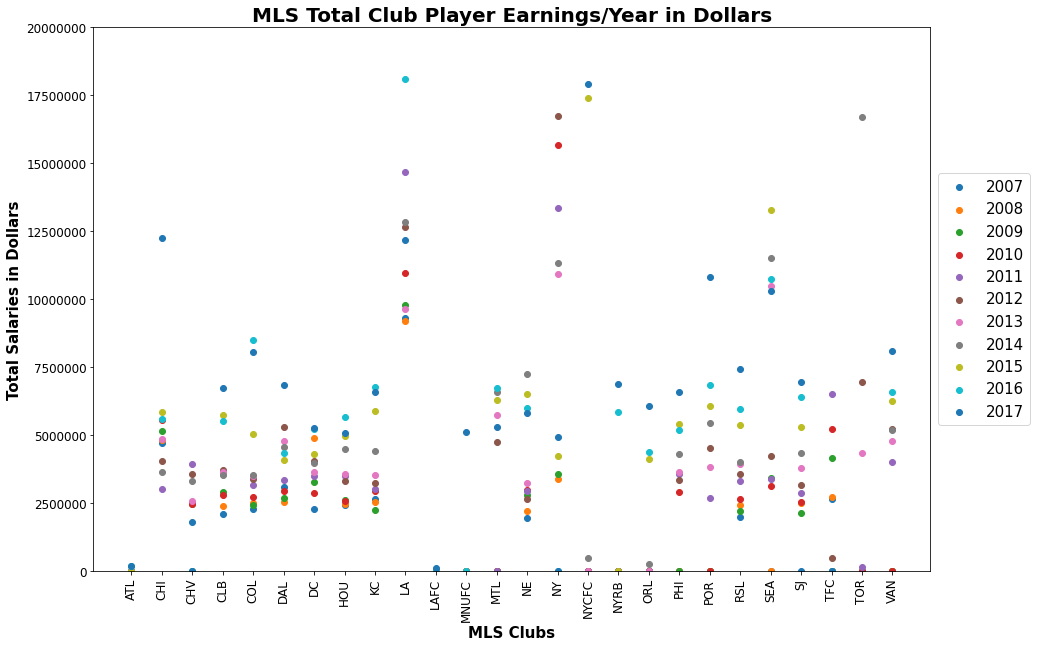

In [ ]:
#2007 Graph:
x_07_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_07_salaries = ([0, 4716304.5, 1789645.70, 2108226.06, 2281303.0, 3072764.75,
               2276390.0, 2434147.09, 2637550.0, 9322054.39, 0, 0, 0, 1945848.0,
               4928089.33, 0, 0, 0, 0, 0, 1974249.75, 0, 0, 2653987.5, 0, 0 ])

#source: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
plt.figure(figsize = (15,10))
plt.scatter(x_07_club, y_07_salaries, label = '2007')
plt.xticks(rotation = 90);
plt.legend()

#2008 Graph
x_08_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_08_salaries = ([0, 4808167.25, 2487846.19, 2372680.81, 2515949.54, 2553060.31,
               4881668.85, 2457094.46, 2551054.0, 9177665.6, 0, 0, 0, 2215295.5, 
               3367589.2, 0, 0, 0, 0, 0, 2418376.32, 0, 2503382.38, 2726478.8, 
               0, 0])

plt.scatter(x_08_club, y_08_salaries, label = '2008')
plt.xticks(rotation = 90);
plt.legend()

#2009 Graph
x_09_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_09_salaries = ([sum_ATL_09, sum_CHI_09, sum_CHV_09, sum_CLB_09, sum_COL_09,
                  sum_DAL_09, sum_DC_09, sum_HOU_09, sum_KC_09, sum_LA_09,
                  sum_LAFC_09, sum_MNUFC_09, sum_MTL_09, sum_NE_09, sum_NY_09,
                  sum_NYCFC_09, sum_NYRB_09, sum_ORL_09, sum_PHI_09, sum_POR_09,
                  sum_RSL_09, sum_SEA_09, sum_SJ_09, sum_TFC_09, sum_TOR_09,
                  sum_VAN_09])

plt.scatter(x_09_club, y_09_salaries, label = '2009')
plt.xticks(rotation = 90);
plt.legend()

#2010 Graph
x_10_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_10_salaries = ([sum_ATL_10, sum_CHI_10, sum_CHV_10, sum_CLB_10, sum_COL_10,
                  sum_DAL_10, sum_DC_10, sum_HOU_10, sum_KC_10, sum_LA_10,
                  sum_LAFC_10, sum_MNUFC_10, sum_MTL_10, sum_NE_10, sum_NY_10,
                  sum_NYCFC_10, sum_NYRB_10, sum_ORL_10, sum_PHI_10, sum_POR_10,
                  sum_RSL_10, sum_SEA_10, sum_SJ_10, sum_TFC_10, sum_TOR_10,
                  sum_VAN_10])

plt.scatter(x_10_club, y_10_salaries, label = '2010')
plt.xticks(rotation = 90);
plt.legend()

#2011 Graph:
x_11_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_11_salaries = ([sum_ATL_11, sum_CHI_11, sum_CHV_11, sum_CLB_11, sum_COL_11,
                  sum_DAL_11, sum_DC_11, sum_HOU_11, sum_KC_11, sum_LA_11,
                  sum_LAFC_11, sum_MNUFC_11, sum_MTL_11, sum_NE_11, sum_NY_11,
                  sum_NYCFC_11, sum_NYRB_11, sum_ORL_11, sum_PHI_11, sum_POR_11,
                  sum_RSL_11, sum_SEA_11, sum_SJ_11, sum_TFC_11, sum_TOR_11,
                  sum_VAN_11])

plt.scatter(x_11_club, y_11_salaries, label = '2011')
plt.xticks(rotation = 90);
plt.legend()

#2012 Graph:
x_12_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_12_salaries = ([sum_ATL_12, sum_CHI_12, sum_CHV_12, sum_CLB_12, sum_COL_12,
                  sum_DAL_12, sum_DC_12, sum_HOU_12, sum_KC_12, sum_LA_12,
                  sum_LAFC_12, sum_MNUFC_12, sum_MTL_12, sum_NE_12, sum_NY_12,
                  sum_NYCFC_12, sum_NYRB_12, sum_ORL_12, sum_PHI_12, sum_POR_12,
                  sum_RSL_12, sum_SEA_12, sum_SJ_12, sum_TFC_12, sum_TOR_12,
                  sum_VAN_12])

plt.scatter(x_12_club, y_12_salaries, label = '2012')
plt.xticks(rotation = 90);
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,20000000)

#2013 Graph:
x_13_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_13_salaries = ([sum_ATL_13, sum_CHI_13, sum_CHV_13, sum_CLB_13, sum_COL_13,
                  sum_DAL_13, sum_DC_13, sum_HOU_13, sum_KC_13, sum_LA_13,
                  sum_LAFC_13, sum_MNUFC_13, sum_MTL_13, sum_NE_13, sum_NY_13,
                  sum_NYCFC_13, sum_NYRB_13, sum_ORL_13, sum_PHI_13, sum_POR_13,
                  sum_RSL_13, sum_SEA_13, sum_SJ_13, sum_TFC_13, sum_TOR_13,
                  sum_VAN_13])

plt.scatter(x_13_club, y_13_salaries, label = '2013')
plt.xticks(rotation = 90);
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,20000000)

#2014 Graph:
x_14_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_14_salaries = ([sum_ATL_14, sum_CHI_14, sum_CHV_14, sum_CLB_14, sum_COL_14,
                  sum_DAL_14, sum_DC_14, sum_HOU_14, sum_KC_14, sum_LA_14,
                  sum_LAFC_14, sum_MNUFC_14, sum_MTL_14, sum_NE_14, sum_NY_14,
                  sum_NYCFC_14, sum_NYRB_14, sum_ORL_14, sum_PHI_14, sum_POR_14,
                  sum_RSL_14, sum_SEA_14, sum_SJ_14, sum_TFC_14, sum_TOR_14,
                  sum_VAN_14])

plt.scatter(x_14_club, y_14_salaries, label = '2014')
plt.xticks(rotation = 90);
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,20000000)

#2015 Graph:
x_15_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_15_salaries = ([sum_ATL_15, sum_CHI_15, sum_CHV_15, sum_CLB_15, sum_COL_15,
                  sum_DAL_15, sum_DC_15, sum_HOU_15, sum_KC_15, sum_LA_15,
                  sum_LAFC_15, sum_MNUFC_15, sum_MTL_15, sum_NE_15, sum_NY_15,
                  sum_NYCFC_15, sum_NYRB_15, sum_ORL_15, sum_PHI_15, sum_POR_15,
                  sum_RSL_15, sum_SEA_15, sum_SJ_15, sum_TFC_15, sum_TOR_15,
                  sum_VAN_15])

plt.scatter(x_15_club, y_15_salaries, label = '2015')
plt.xticks(rotation = 90);
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,20000000)

#2016 Graph:
x_16_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_16_salaries = ([sum_ATL_16, sum_CHI_16, sum_CHV_16, sum_CLB_16, sum_COL_16,
                  sum_DAL_16, sum_DC_16, sum_HOU_16, sum_KC_16, sum_LA_16,
                  sum_LAFC_16, sum_MNUFC_16, sum_MTL_16, sum_NE_16, sum_NY_16,
                  sum_NYCFC_16, sum_NYRB_16, sum_ORL_16, sum_PHI_16, sum_POR_16,
                  sum_RSL_16, sum_SEA_16, sum_SJ_16, sum_TFC_16, sum_TOR_16,
                  sum_VAN_16])

plt.scatter(x_16_club, y_16_salaries, label = '2016')
plt.xticks(rotation = 90);
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,20000000)

#2017 Graph:
x_17_club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
y_17_salaries = ([sum_ATL_17, sum_CHI_17, sum_CHV_17, sum_CLB_17, sum_COL_17,
                  sum_DAL_17, sum_DC_17, sum_HOU_17, sum_KC_17, sum_LA_17,
                  sum_LAFC_17, sum_MNUFC_17, sum_MTL_17, sum_NE_17, sum_NY_17,
                  sum_NYCFC_17, sum_NYRB_17, sum_ORL_17, sum_PHI_17, sum_POR_17,
                  sum_RSL_17, sum_SEA_17, sum_SJ_17, sum_TFC_17, sum_TOR_17,
                  sum_VAN_17])

plt.scatter(x_17_club, y_17_salaries, label = '2017')
plt.title('MLS Total Club Player Earnings/Year in Dollars', fontsize = 20, fontweight = 'bold');
plt.xlabel('MLS Clubs', fontsize = 15, fontweight = 'bold')
plt.ylabel('Total Salaries in Dollars', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 90, fontsize = 12);
plt.yticks(fontsize = 12)
#Source:https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0,20000000)

##Interpretation of the Graph
In the 'MLS Total Club Player Earnings/Year in Dollars' graph we can clearly see the distribution of each clubs total earnings per year. For the most part we are able to notice that for every club there is a raise in total earnings per year. Although, in some cases there are teams who have dots near the 0 on the y-axis and that is becausee those teams are fairly new to the MLS and players have not yet generated any earnings over the span of 2007-2017. 

#Summary/Conclusion of Research Question 3
Overall, the player earnigs over the years seems to vary by club. For example, there are such teams in which players generated more in previous years such as LA. We can see that the clubs highest earning was in 2016 which was roughly above 17,500,000, followed by 2011, 2014, and so forth.

There are many factors on why this might be possible. For example, LA might have signed a contract with a star player that is requesting a great amount of money during x year but, lets say that two years later that star player retires, and LA doesn't sign a contract with another star player and decides to sign a contract with a player that is demanding less money. 

#Primary Question
In order to answer this question we first need to sum up the salaries of  individual club starting from 2007 all the way through 2017. 

In [ ]:
#Here we are just calculating the sum of each club in order to determine the primary question.
sum_ATL = sum_ATL_07 + sum_ATL_08 + sum_ATL_09 + sum_ATL_10 + sum_ATL_11 + sum_ATL_12 + sum_ATL_13 + sum_ATL_14 + sum_ATL_15 + sum_ATL_16 + sum_ATL_17
sum_ATL

sum_CHI = sum_CHI_07 + sum_CHI_08 + sum_CHI_09 + sum_CHI_10 + sum_CHI_11 + sum_CHI_12 + sum_CHI_13 + sum_CHI_14 + sum_CHI_15 + sum_CHI_16 + sum_CHI_17
sum_CHI

sum_CHV = sum_CHV_07 + sum_CHV_08 + sum_CHV_09 + sum_CHV_10 + sum_CHV_11 + sum_CHV_12 + sum_CHV_13 + sum_CHV_14 + sum_CHV_15 + sum_CHV_16 + sum_CHV_17
sum_CHV

sum_CLB = sum_CLB_07 + sum_CLB_08 + sum_CLB_09 + sum_CLB_10 + sum_CLB_11 + sum_CLB_12 + sum_CLB_13 + sum_CLB_14 + sum_CLB_15 + sum_CLB_16 + sum_CLB_17
sum_CLB

sum_COL = sum_COL_07 + sum_COL_08 + sum_COL_09 + sum_COL_10 + sum_COL_11 + sum_COL_12 + sum_COL_13 + sum_COL_14 + sum_COL_15 + sum_COL_16 + sum_COL_17
sum_COL

sum_DAL = sum_DAL_07 + sum_DAL_08 + sum_DAL_09 + sum_DAL_10 + sum_DAL_11 + sum_DAL_12 + sum_DAL_13 + sum_DAL_14 + sum_DAL_15 + sum_DAL_16 + sum_DAL_17
sum_DAL

sum_DC = sum_DC_07 + sum_DC_08 + sum_DC_09 + sum_DC_10 + sum_DC_11 + sum_DC_12 + sum_DC_13 + sum_DC_14 + sum_DC_15 + sum_DC_16 + sum_DC_17
sum_DC

sum_HOU = sum_HOU_07 + sum_HOU_08 + sum_HOU_09 + sum_HOU_10 + sum_HOU_11 + sum_HOU_12 + sum_HOU_13 + sum_HOU_14 + sum_HOU_15 + sum_HOU_16 + sum_HOU_17
sum_HOU

sum_KC = sum_KC_07 + sum_KC_08 + sum_KC_09 + sum_KC_10 + sum_KC_11 + sum_KC_12 + sum_KC_13 + sum_KC_14 + sum_KC_15 + sum_KC_16 + sum_KC_17
sum_KC

sum_LA = sum_LA_07 + sum_LA_08 + sum_LA_09 + sum_LA_10 + sum_LA_11 + sum_LA_12 + sum_LA_13 + sum_LA_14 + sum_LA_15 + sum_LA_16 + sum_LA_17
sum_LA

sum_LAFC = sum_LAFC_07 + sum_LAFC_08 + sum_LAFC_09 + sum_LAFC_10 + sum_LAFC_11 + sum_LAFC_12 + sum_LAFC_13 + sum_LAFC_14 + sum_LAFC_15 + sum_LAFC_16 + sum_LAFC_17
sum_LAFC

sum_MNUFC = sum_MNUFC_07 + sum_MNUFC_08 + sum_MNUFC_09 + sum_MNUFC_10 + sum_MNUFC_11 + sum_MNUFC_12 + sum_MNUFC_13 + sum_MNUFC_14 + sum_MNUFC_15 + sum_MNUFC_16 + sum_MNUFC_17
sum_MNUFC

sum_MTL = sum_MTL_07 + sum_MTL_08 + sum_MTL_09 + sum_MTL_10 + sum_MTL_11 + sum_MTL_12 + sum_MTL_13 + sum_MTL_14 + sum_MTL_15 + sum_MTL_16 + sum_MTL_17
sum_MTL

sum_NE = sum_NE_07 + sum_NE_08 + sum_NE_09 + sum_NE_10 + sum_NE_11 + sum_NE_12 + sum_NE_13 + sum_NE_14 + sum_NE_15 + sum_NE_16 + sum_NE_17
sum_NE

sum_NY = sum_NY_07 + sum_NY_08 + sum_NY_09 + sum_NY_10 + sum_NY_11 + sum_NY_12 + sum_NY_13 + sum_NY_14 + sum_NY_15 + sum_NY_16 + sum_NY_17
sum_NY

sum_NYCFC = sum_NYCFC_07 + sum_NYCFC_08 + sum_NYCFC_09 + sum_NYCFC_10 + sum_NYCFC_11 + sum_NYCFC_12 + sum_NYCFC_13 + sum_NYCFC_14 + sum_NYCFC_15 + sum_NYCFC_16 + sum_NYCFC_17
sum_NYCFC

sum_NYRB = sum_NYRB_07 + sum_NYRB_08 + sum_NYRB_09 + sum_NYRB_10 + sum_NYRB_11 + sum_NYRB_12 + sum_NYRB_13 + sum_NYRB_14 + sum_NYRB_15 + sum_NYRB_16 + sum_NYRB_17
sum_NYRB

sum_ORL = sum_ORL_07 + sum_ORL_08 + sum_ORL_09 + sum_ORL_10 + sum_ORL_11 + sum_ORL_12 + sum_ORL_13 + sum_ORL_14 + sum_ORL_15 + sum_ORL_16 + sum_ORL_17
sum_ORL

sum_PHI = sum_PHI_07 + sum_PHI_08 + sum_PHI_09 + sum_PHI_10 + sum_PHI_11 + sum_PHI_12 + sum_PHI_13 + sum_PHI_14 + sum_PHI_15 + sum_PHI_16 + sum_PHI_17
sum_PHI

sum_POR = sum_POR_07 + sum_POR_08 + sum_POR_09 + sum_POR_10 + sum_POR_11 + sum_POR_12 + sum_POR_13 + sum_POR_14 + sum_POR_15 + sum_POR_16 + sum_POR_17
sum_POR

sum_RSL = sum_RSL_07 + sum_RSL_08 + sum_RSL_09 + sum_RSL_10 + sum_RSL_11 + sum_RSL_12 + sum_RSL_13 + sum_RSL_14 + sum_RSL_15 + sum_RSL_16 + sum_RSL_17
sum_RSL

sum_SEA = sum_SEA_07 + sum_SEA_08 + sum_SEA_09 + sum_SEA_10 + sum_SEA_11 + sum_SEA_12 + sum_SEA_13 + sum_SEA_14 + sum_SEA_15 + sum_SEA_16 + sum_SEA_17
sum_SEA

sum_SJ = sum_SJ_07 + sum_SJ_08 + sum_SJ_09 + sum_SJ_10 + sum_SJ_11 + sum_SJ_12 + sum_SJ_13 + sum_SJ_14 + sum_SJ_15 + sum_SJ_16 + sum_SJ_17
sum_SJ

sum_TFC = sum_TFC_07 + sum_TFC_08 + sum_TFC_09 + sum_TFC_10 + sum_TFC_11 + sum_TFC_12 + sum_TFC_13 + sum_TFC_14 + sum_TFC_15 + sum_TFC_16 + sum_TFC_17
sum_TFC

sum_TOR = sum_TOR_07 + sum_TOR_08 + sum_TOR_09 + sum_TOR_10 + sum_TOR_11 + sum_TOR_12 + sum_TOR_13 + sum_TOR_14 + sum_TOR_15 + sum_TOR_16 + sum_TOR_17
sum_TOR

sum_VAN = sum_VAN_07 + sum_VAN_08 + sum_VAN_09 + sum_VAN_10 + sum_VAN_11 + sum_VAN_12 + sum_VAN_13 + sum_VAN_14 + sum_VAN_15 + sum_VAN_16 + sum_VAN_17
sum_VAN


40088589.38

(0.0, 150000000.0)

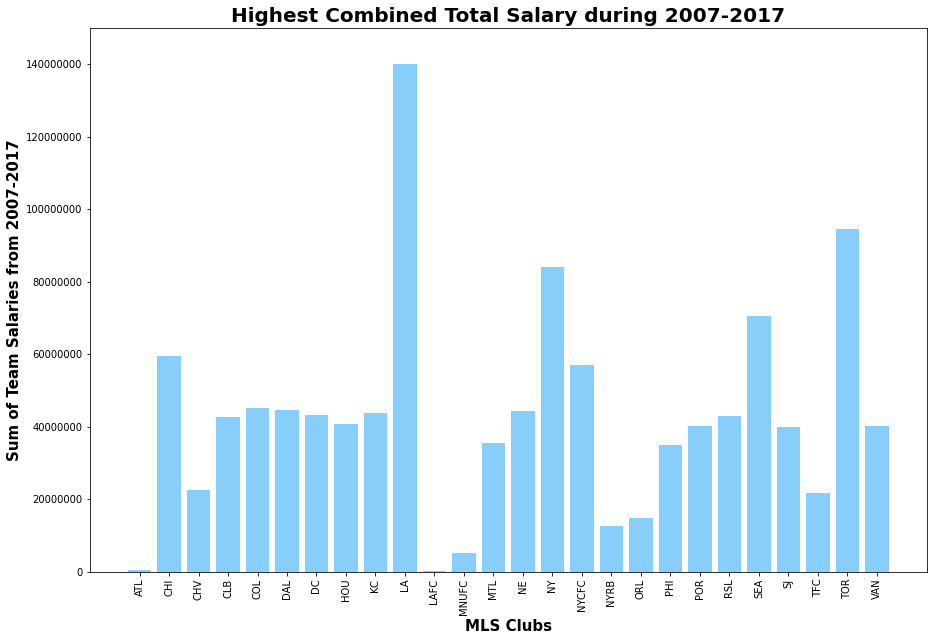

In [ ]:
club = (['ATL', 'CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'LAFC', 
           'MNUFC', 'MTL', 'NE', 'NY', 'NYCFC', 'NYRB', 'ORL', 'PHI', 'POR', 'RSL' ,
           'SEA', 'SJ', 'TFC', 'TOR', 'VAN']) 
sum_clubs_salaries = ([sum_ATL, sum_CHI, sum_CHV, sum_CLB, sum_COL, sum_DAL,
               sum_DC, sum_HOU, sum_KC, sum_LA, sum_LAFC, sum_MNUFC, sum_MTL, sum_NE,
               sum_NY, sum_NYCFC, sum_NYRB, sum_ORL, sum_PHI, sum_POR, sum_RSL, sum_SEA,
               sum_SJ, sum_TFC, sum_TOR, sum_VAN ])

plt.figure(figsize = (15,10))
plt.bar(club, sum_clubs_salaries, color = 'lightskyblue')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Highest Combined Total Salary during 2007-2017', fontsize = 20, fontweight = 'bold')
plt.xticks(rotation = 90);
plt.xlabel('MLS Clubs', fontsize = 15, fontweight = 'bold')
plt.ylabel('Sum of Team Salaries from 2007-2017', fontsize = 15, fontweight = 'bold')
plt.ylim(0,150000000)


#plt.scatter(x_17_club, y_17_salaries, label = '2017')
#plt.title('MLS Total Club Player Earnings/Year in Dollars', fontsize = 20, fontweight = 'bold');
#plt.xlabel('MLS Clubs', fontsize = 15, fontweight = 'bold')
#plt.ylabel('Total Salaries in Dollars', fontsize = 15, fontweight = 'bold')
#plt.xticks(rotation = 90, fontsize = 12);
#plt.yticks(fontsize = 12)
#Source:https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 15)
#plt.ticklabel_format(style='plain', axis='y')
#plt.ylim(0,20000000)

#Interpretation of the Graph
Based on the Graph, we are able to clearly see the LA is the club that has the highest combined total salary during 2007-2017. The bar is roughly above 140,000,000 dollars, but to be exact the bar is at 140,221,982.16 dollars as shown below.

In [ ]:
sum_LA

140221982.16000003